# Exploratory Data Analysis

In [ ]:
!wget https://technionmail-my.sharepoint.com/:u:/g/personal/ploznik_campus_technion_ac_il/EQc79uRBeO1FqtH6ILFDx78BuuWui3DuRaBtnzTB6Aqxqg?download=1 -O data.tar
!tar -xf data.tar

--2022-05-12 08:10:50--  https://technionmail-my.sharepoint.com/:u:/g/personal/ploznik_campus_technion_ac_il/EQc79uRBeO1FqtH6ILFDx78BuuWui3DuRaBtnzTB6Aqxqg?download=1
Resolving technionmail-my.sharepoint.com (technionmail-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to technionmail-my.sharepoint.com (technionmail-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/ploznik_campus_technion_ac_il/Documents/HW1_data/data.tar?ga=1 [following]
--2022-05-12 08:10:51--  https://technionmail-my.sharepoint.com/personal/ploznik_campus_technion_ac_il/Documents/HW1_data/data.tar?ga=1
Reusing existing connection to technionmail-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 212420608 (203M) [application/x-tar]
Saving to: ‘data.tar’

data.tar            100%[===================>] 202.58M  56.4MB/s    in 3.6s    

2022-05-12 08:10:55 (56.4 MB/s) - ‘data.tar’ saved [212420608/212420608]



In [ ]:
import os
import pandas as pd
files = os.listdir('data/train')
full_data = pd.concat([pd.read_csv(f'data/train/{file_p}',sep='|') for file_p in (files)])


a. Which features are available in the dataset

In [ ]:
full_data.columns


Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'Unit1', 'Unit2',
       'HospAdmTime', 'ICULOS', 'SepsisLabel'],
      dtype='object')

**Basic data description:**

* Distribution values for each feature.

In [ ]:
description = full_data.describe(include='all')
# count the percent of null values (missing data) in each parameter:
description.loc['not null(%)'] = round(description.loc['count'] / (full_data.shape[0])*100,2)
description = round(description,2)
description = description.T
description

,count,mean,std,min,25%,50%,75%,max,not null(%)
HR,690913.0,84.66,17.40,20.00,72.00,84.00,96.00,280.00,90.09
O2Sat,666682.0,97.19,2.95,20.00,96.00,98.00,99.50,100.00,86.93
Temp,260148.0,36.98,0.78,20.90,36.50,37.00,37.50,50.00,33.92
SBP,654052.0,123.52,23.16,20.00,106.50,121.00,138.00,299.00,85.29
MAP,671078.0,82.30,16.29,20.00,71.00,80.00,92.00,300.00,87.51
DBP,527697.0,63.79,13.90,20.00,54.00,62.00,72.00,300.00,68.81
Resp,648543.0,18.75,5.11,1.00,15.00,18.00,21.50,100.00,84.57
EtCO2,27441.0,33.03,7.99,10.00,28.00,33.00,38.00,100.00,3.58
BaseExcess,42076.0,-0.75,4.31,-32.00,-3.00,0.00,1.00,49.50,5.49
HCO3,31809.0,24.08,4.39,0.00,22.00,24.00,26.00,55.00,4.15


* Missing Data: checking the percent of not null values for each feature 

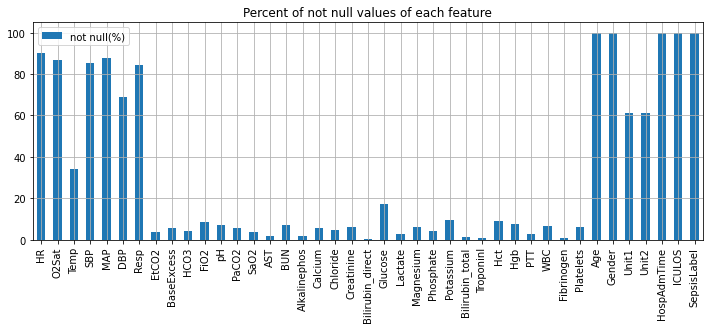

In [ ]:
gr = description.plot.bar(y='not null(%)',figsize=(12, 4), grid=True, title='Percent of not null values of each feature')

Feature distribution:

Histograms for each feature.

In [ ]:
# function for printing two histograms- of "have sepsis" and "no sepsis"- for one parameter
# using those histograms for checking if the distribution is normal, so we can use Ttest

import matplotlib.pyplot as plt
def printHist(colName, tmpDF):
  tmpDF[tmpDF['SepsisLabel']==1][colName].hist(color='r',alpha=0.6)
  tmpDF[tmpDF['SepsisLabel']==0][colName].hist(color='g',alpha=0.4)
  plt.title(f'Histograms of {colName} for have sepsis and no sepsis')
  plt.xlabel(f'{colName} value')
  plt.ylabel("amount of people")
  plt.legend(['sepsis','no sepsis'])
  plt.show()

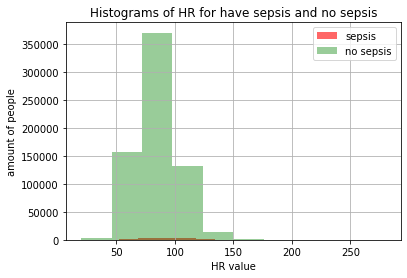

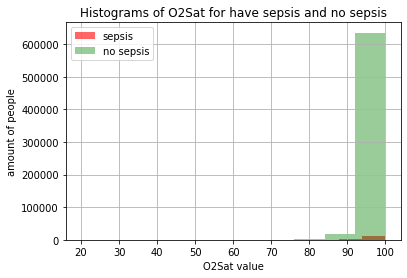

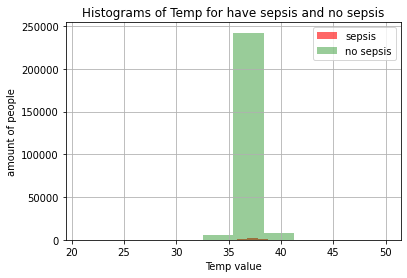

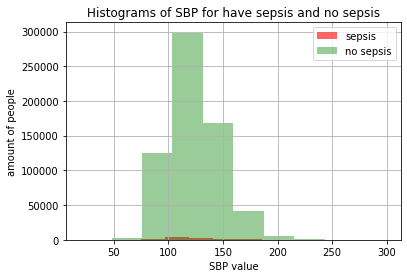

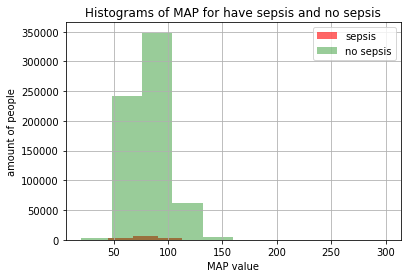

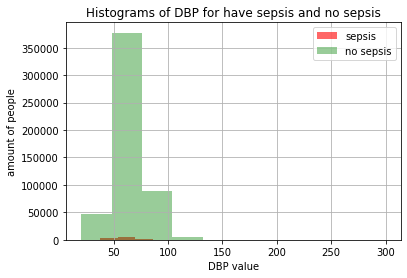

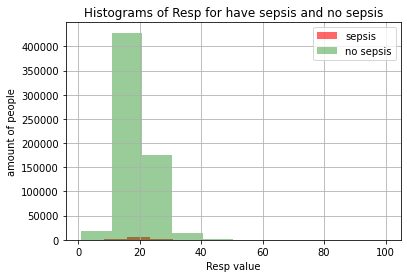

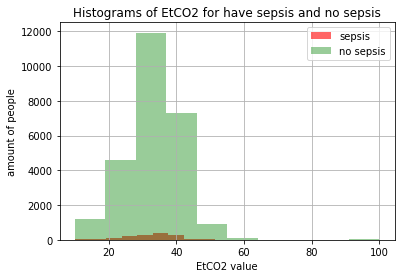

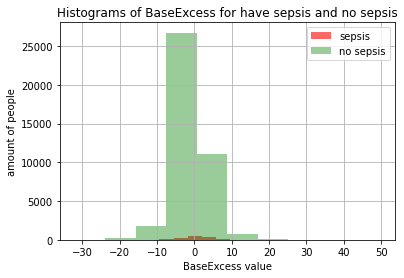

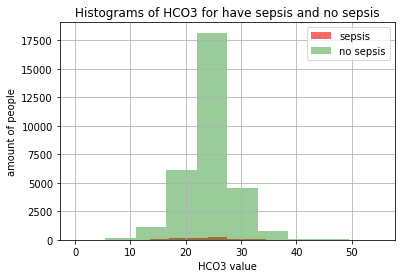

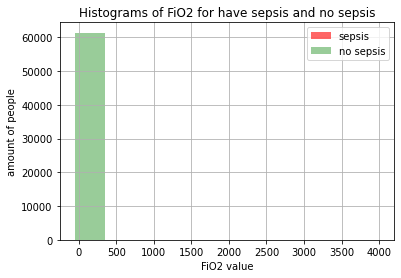

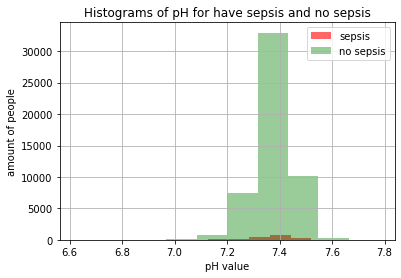

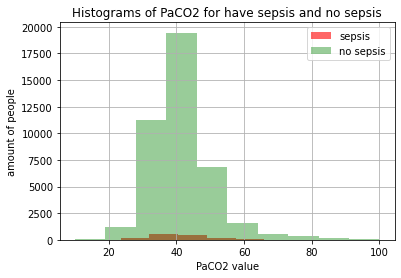

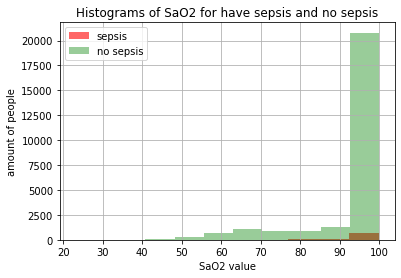

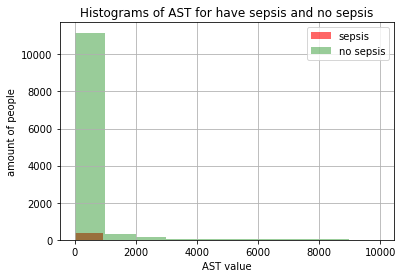

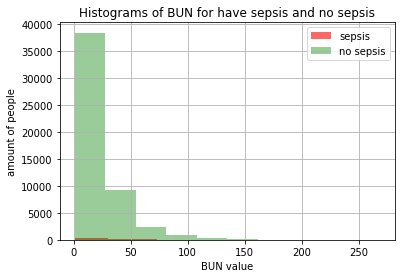

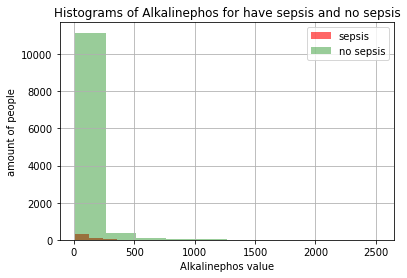

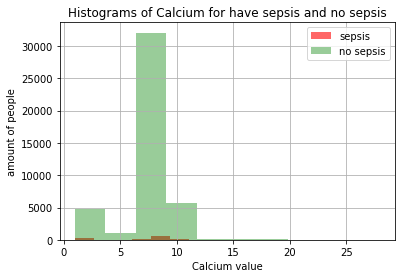

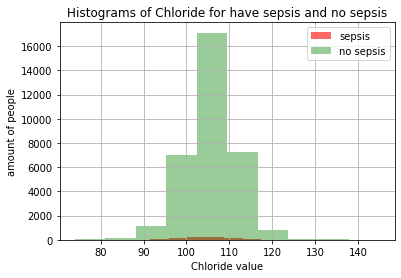

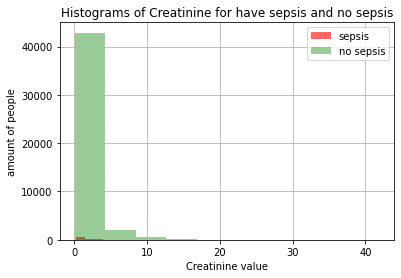

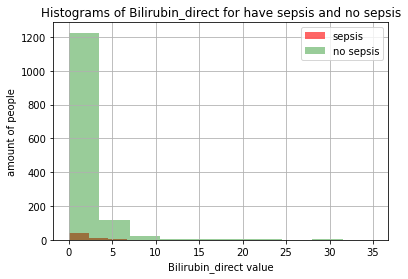

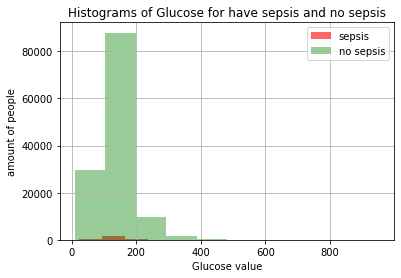

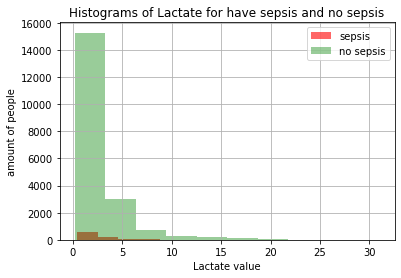

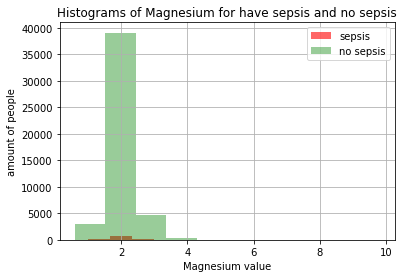

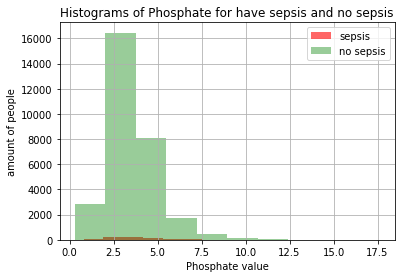

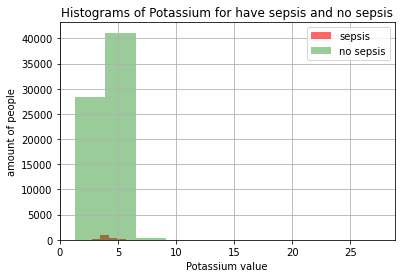

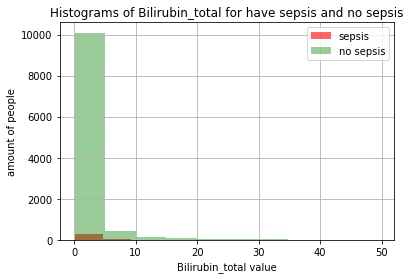

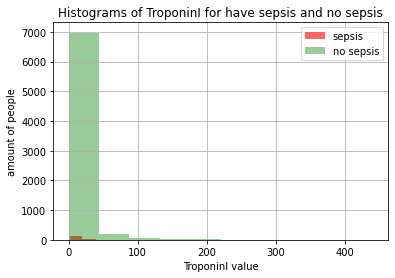

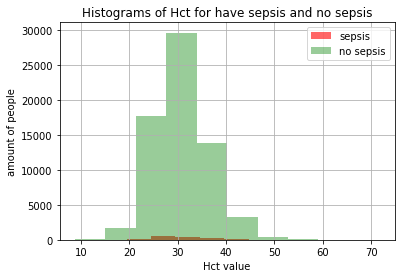

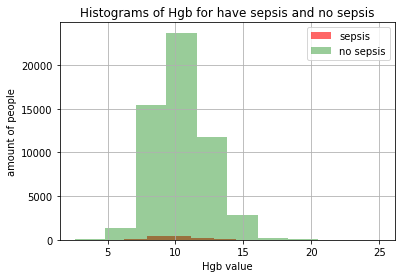

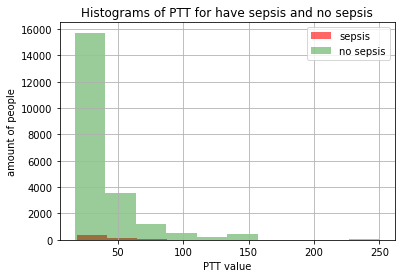

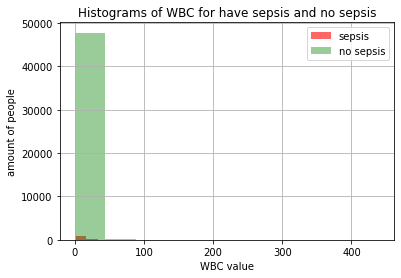

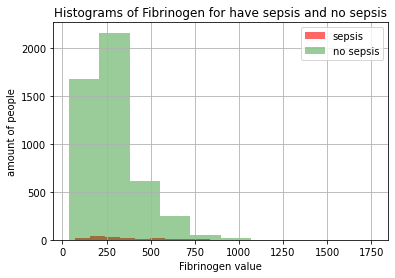

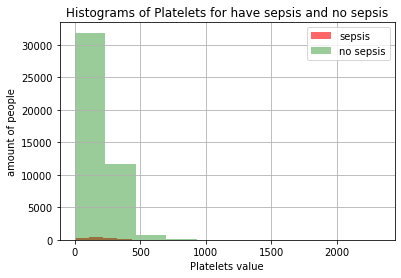

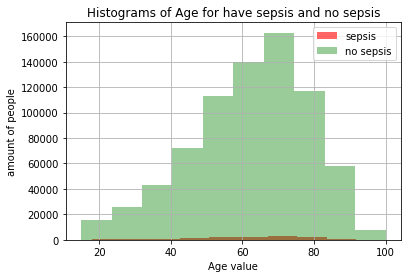

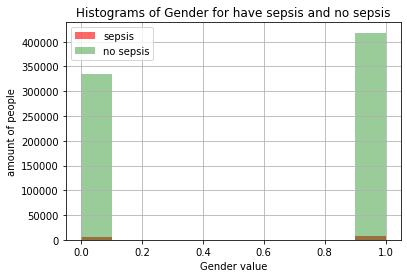

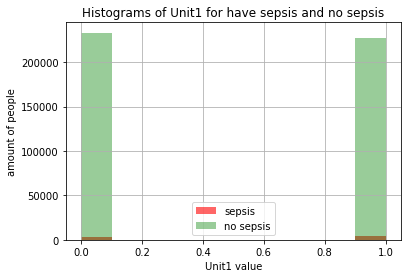

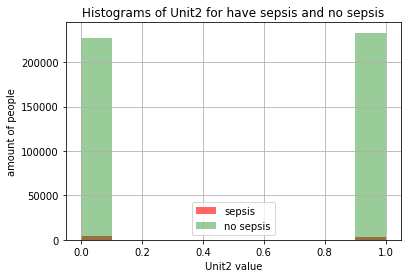

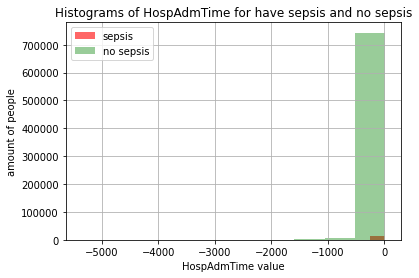

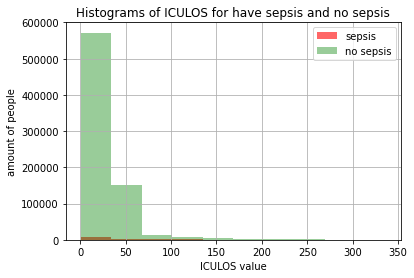

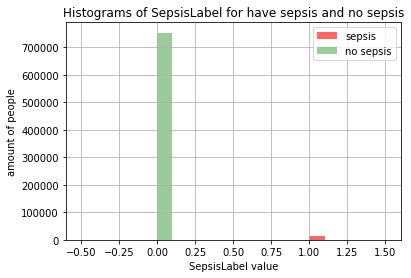

In [ ]:
feature_list = list(full_data.columns.values)
for feat in feature_list:
  printHist(feat, full_data)

# Specific Data Analysis

To get more helpfull results, we decided to make more specific data exploration.



In [ ]:
# for each patient return a "window" of 10 rows and the label.
# for patiet without sepsis the "window" is the last 10 rows, and the label=0.
# for patiet with sepsis the "window" is the the first row with SepsisLabel==1 
# and the 9 rows before it, and the label=1.

def take_rows(patient_df: pd.DataFrame, num_rows=25):
  if patient_df.SepsisLabel.sum()>0:
    tmp = patient_df.SepsisLabel.argmax()+1
    label = 1
  else:
    tmp = patient_df.shape[0]
    label = 0
  return patient_df.iloc[tmp-num_rows:tmp], label

In [ ]:
# create dataframes for each feature/metric group, and in each of them every patient will be represented as one row
# patient row - is a result of an aggrigation of his "window" by metric(mean/std/max/min/last-mean-difference)

dfMean = pd.DataFrame(columns = full_data.columns)
dfStd = pd.DataFrame(columns = full_data.columns)
dfMax = pd.DataFrame(columns = full_data.columns)
dfMin = pd.DataFrame(columns = full_data.columns)
dfLastMeanDif = pd.DataFrame(columns = full_data.columns)


for file_p in files:
  dftry = pd.read_csv(f'data/train/{file_p}',sep='|')
  window_df, label = take_rows(dftry)

  # mean
  resMean = window_df.mean()
  resMean.SepsisLabel = label
  dfMean = dfMean.append(resMean, ignore_index = True)

  # std
  resStd = window_df.std()
  resStd.SepsisLabel = label
  dfStd = dfStd.append(resStd, ignore_index = True)

  # max
  resMax = window_df.max()
  resMax.SepsisLabel = label
  dfMax = dfMax.append(resMax, ignore_index = True)

  # min
  resMin = window_df.max()
  resMin.SepsisLabel = label
  dfMin = dfMin.append(resMin, ignore_index = True)

  # difference between the last hour values and the mean values of 10hours
  resLastMean = window_df.tail(1) - window_df.mean()
  resLastMean.SepsisLabel = label
  dfLastMeanDif = dfLastMeanDif.append(resLastMean, ignore_index = True)

In [ ]:
# make Ttest for current parameter in current dataframe, where:
# μ1 is the μ for "have sepsis"
# μ2 is the μ for "no sepsis"
# null hypothesis H0: μ1 = μ2
# level of significance: alpha = 0.05

from scipy import stats

def tTest(colName, tmpDF):
  # t-test for null hypothesis H0 that μ1 = μ2
  SEP=tmpDF[tmpDF['SepsisLabel']==1][colName].dropna()  # for μ1
  NOSEP=tmpDF[tmpDF['SepsisLabel']==0][colName].dropna()  # for μ2

  t_value,p_value=stats.ttest_ind(SEP,NOSEP)

  print(f'\n Ttest - Check {colName} parameter:')
  print('Test statistic is %f'%float("{:.6f}".format(t_value)))
  print('p-value for two tailed test is %f'%p_value)
  flag = True
  alpha = 0.05
  if p_value<=alpha:
      print('Conclusion','n','Since p-value(=%f)'%p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0 for''', colName ,'''parameter. at %.2f level of significance.'''%alpha)
      flag = True
  else:
      print('Conclusion','n','Since p-value(=%f)'%p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0 for''', colName ,'''parameter.''')
      flag = False
  return flag

In [ ]:
# make wilcoxon test for current parameter in current dataframe, where:
# ** (mannwhitneyu is a version of wilcoxon test for two sets with different sizes)
# ** this test is usefull for parameters with not normal distribution
# It is a non-parametric version of the paired T-test.
# level of significance: alpha = 0.05


def WTest(colName, tmpDF):
  SEP=dfMean[dfMean['SepsisLabel']==1][colName].dropna()  # for μ1
  NOSEP=dfMean[dfMean['SepsisLabel']==0][colName].dropna()  # for μ2
  w_value,w_p_value=stats.mannwhitneyu(SEP,NOSEP,alternative="two-sided")
  print(f'\n Wilcoxon  - Check {colName} parameter in wilcoxon test:')
  print('Test statistic is %f'%float("{:.6f}".format(w_value)))
  print('p-value for two tailed test is %f'%w_p_value)
  flag = True
  alpha = 0.05
  if w_p_value<=alpha:
      print('Conclusion','n','Since p-value(=%f)'%w_p_value,'<','alpha(=%.2f)'%alpha,'''We reject the null hypothesis H0 for''', colName ,'''parameter. at %.2f level of significance.'''%alpha)
      flag = True
  else:
      print('Conclusion','n','Since p-value(=%f)'%w_p_value,'>','alpha(=%.2f)'%alpha,'''We do not reject the null hypothesis H0 for''', colName ,'''parameter.''')
      flag = False
  print('\n\n')
  return flag

-------------------------------------------------------
histograms, Ttest and Wilcoxon-Test results for mean of each parameter
-------------------------------------------------------


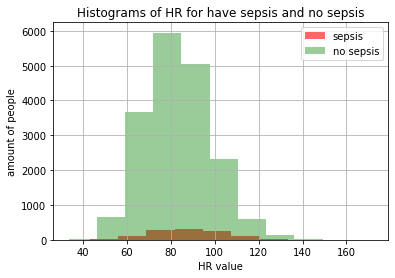


 Ttest - Check HR parameter:
Test statistic is 12.353960
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for HR parameter. at 0.05 level of significance.

 Wilcoxon  - Check HR parameter in wilcoxon test:
Test statistic is 12303692.500000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for HR parameter. at 0.05 level of significance.





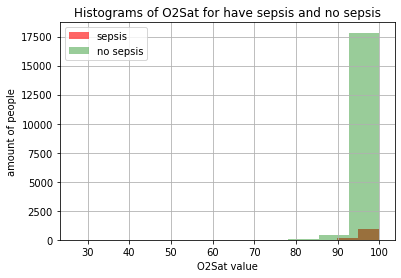


 Ttest - Check O2Sat parameter:
Test statistic is 2.734202
p-value for two tailed test is 0.006259
Conclusion n Since p-value(=0.006259) < alpha(=0.05) We reject the null hypothesis H0 for O2Sat parameter. at 0.05 level of significance.

 Wilcoxon  - Check O2Sat parameter in wilcoxon test:
Test statistic is 11078426.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for O2Sat parameter. at 0.05 level of significance.





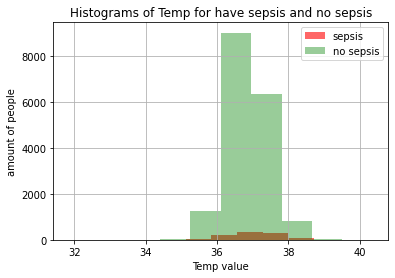


 Ttest - Check Temp parameter:
Test statistic is 10.298178
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Temp parameter. at 0.05 level of significance.

 Wilcoxon  - Check Temp parameter in wilcoxon test:
Test statistic is 10516195.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Temp parameter. at 0.05 level of significance.





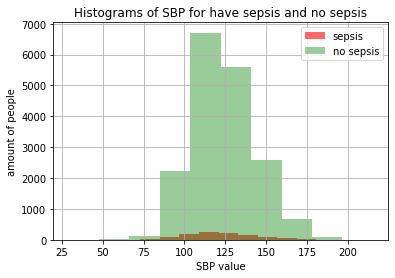


 Ttest - Check SBP parameter:
Test statistic is -2.230799
p-value for two tailed test is 0.025706
Conclusion n Since p-value(=0.025706) < alpha(=0.05) We reject the null hypothesis H0 for SBP parameter. at 0.05 level of significance.

 Wilcoxon  - Check SBP parameter in wilcoxon test:
Test statistic is 8962797.000000
p-value for two tailed test is 0.036610
Conclusion n Since p-value(=0.036610) < alpha(=0.05) We reject the null hypothesis H0 for SBP parameter. at 0.05 level of significance.





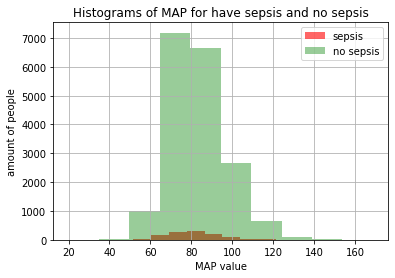


 Ttest - Check MAP parameter:
Test statistic is -4.233930
p-value for two tailed test is 0.000023
Conclusion n Since p-value(=0.000023) < alpha(=0.05) We reject the null hypothesis H0 for MAP parameter. at 0.05 level of significance.

 Wilcoxon  - Check MAP parameter in wilcoxon test:
Test statistic is 9505940.500000
p-value for two tailed test is 0.000583
Conclusion n Since p-value(=0.000583) < alpha(=0.05) We reject the null hypothesis H0 for MAP parameter. at 0.05 level of significance.





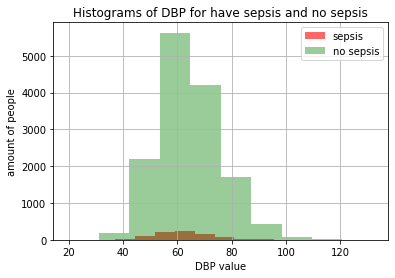


 Ttest - Check DBP parameter:
Test statistic is -4.336773
p-value for two tailed test is 0.000015
Conclusion n Since p-value(=0.000015) < alpha(=0.05) We reject the null hypothesis H0 for DBP parameter. at 0.05 level of significance.

 Wilcoxon  - Check DBP parameter in wilcoxon test:
Test statistic is 5793612.000000
p-value for two tailed test is 0.000082
Conclusion n Since p-value(=0.000082) < alpha(=0.05) We reject the null hypothesis H0 for DBP parameter. at 0.05 level of significance.





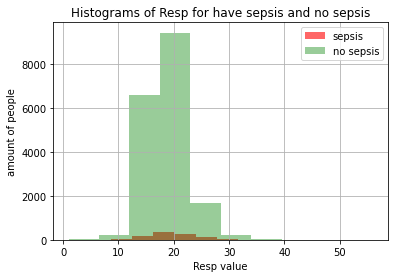


 Ttest - Check Resp parameter:
Test statistic is 11.104781
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Resp parameter. at 0.05 level of significance.

 Wilcoxon  - Check Resp parameter in wilcoxon test:
Test statistic is 11674948.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Resp parameter. at 0.05 level of significance.





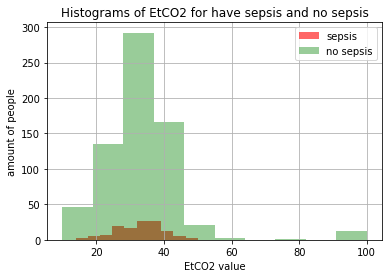


 Ttest - Check EtCO2 parameter:
Test statistic is -0.528470
p-value for two tailed test is 0.597320
Conclusion n Since p-value(=0.597320) > alpha(=0.05) We do not reject the null hypothesis H0 for EtCO2 parameter.

 Wilcoxon  - Check EtCO2 parameter in wilcoxon test:
Test statistic is 42594.500000
p-value for two tailed test is 0.664844
Conclusion n Since p-value(=0.664844) > alpha(=0.05) We do not reject the null hypothesis H0 for EtCO2 parameter.





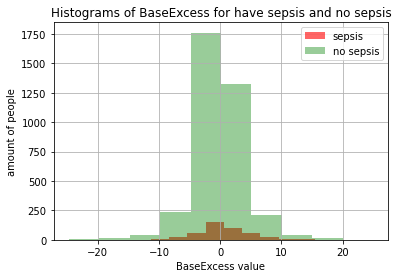


 Ttest - Check BaseExcess parameter:
Test statistic is 2.585636
p-value for two tailed test is 0.009754
Conclusion n Since p-value(=0.009754) < alpha(=0.05) We reject the null hypothesis H0 for BaseExcess parameter. at 0.05 level of significance.

 Wilcoxon  - Check BaseExcess parameter in wilcoxon test:
Test statistic is 848686.500000
p-value for two tailed test is 0.019760
Conclusion n Since p-value(=0.019760) < alpha(=0.05) We reject the null hypothesis H0 for BaseExcess parameter. at 0.05 level of significance.





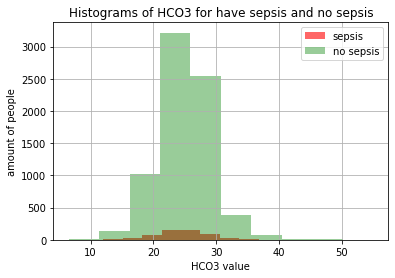


 Ttest - Check HCO3 parameter:
Test statistic is -0.043815
p-value for two tailed test is 0.965053
Conclusion n Since p-value(=0.965053) > alpha(=0.05) We do not reject the null hypothesis H0 for HCO3 parameter.

 Wilcoxon  - Check HCO3 parameter in wilcoxon test:
Test statistic is 2013805.000000
p-value for two tailed test is 0.562284
Conclusion n Since p-value(=0.562284) > alpha(=0.05) We do not reject the null hypothesis H0 for HCO3 parameter.





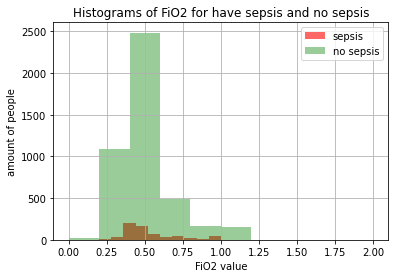


 Ttest - Check FiO2 parameter:
Test statistic is 4.784076
p-value for two tailed test is 0.000002
Conclusion n Since p-value(=0.000002) < alpha(=0.05) We reject the null hypothesis H0 for FiO2 parameter. at 0.05 level of significance.

 Wilcoxon  - Check FiO2 parameter in wilcoxon test:
Test statistic is 1507641.000000
p-value for two tailed test is 0.000101
Conclusion n Since p-value(=0.000101) < alpha(=0.05) We reject the null hypothesis H0 for FiO2 parameter. at 0.05 level of significance.





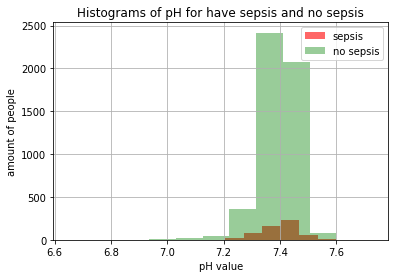


 Ttest - Check pH parameter:
Test statistic is 1.143252
p-value for two tailed test is 0.252983
Conclusion n Since p-value(=0.252983) > alpha(=0.05) We do not reject the null hypothesis H0 for pH parameter.

 Wilcoxon  - Check pH parameter in wilcoxon test:
Test statistic is 1465724.000000
p-value for two tailed test is 0.172022
Conclusion n Since p-value(=0.172022) > alpha(=0.05) We do not reject the null hypothesis H0 for pH parameter.





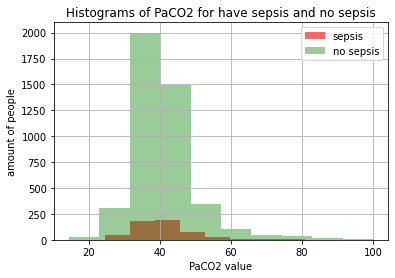


 Ttest - Check PaCO2 parameter:
Test statistic is 0.140309
p-value for two tailed test is 0.888422
Conclusion n Since p-value(=0.888422) > alpha(=0.05) We do not reject the null hypothesis H0 for PaCO2 parameter.

 Wilcoxon  - Check PaCO2 parameter in wilcoxon test:
Test statistic is 1191247.500000
p-value for two tailed test is 0.976337
Conclusion n Since p-value(=0.976337) > alpha(=0.05) We do not reject the null hypothesis H0 for PaCO2 parameter.





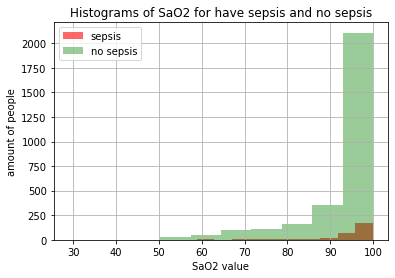


 Ttest - Check SaO2 parameter:
Test statistic is 2.673301
p-value for two tailed test is 0.007549
Conclusion n Since p-value(=0.007549) < alpha(=0.05) We reject the null hypothesis H0 for SaO2 parameter. at 0.05 level of significance.

 Wilcoxon  - Check SaO2 parameter in wilcoxon test:
Test statistic is 479035.500000
p-value for two tailed test is 0.001774
Conclusion n Since p-value(=0.001774) < alpha(=0.05) We reject the null hypothesis H0 for SaO2 parameter. at 0.05 level of significance.





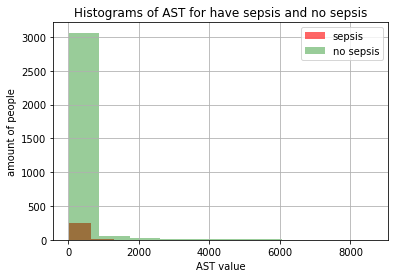


 Ttest - Check AST parameter:
Test statistic is 0.030806
p-value for two tailed test is 0.975426
Conclusion n Since p-value(=0.975426) > alpha(=0.05) We do not reject the null hypothesis H0 for AST parameter.

 Wilcoxon  - Check AST parameter in wilcoxon test:
Test statistic is 451343.000000
p-value for two tailed test is 0.011535
Conclusion n Since p-value(=0.011535) < alpha(=0.05) We reject the null hypothesis H0 for AST parameter. at 0.05 level of significance.





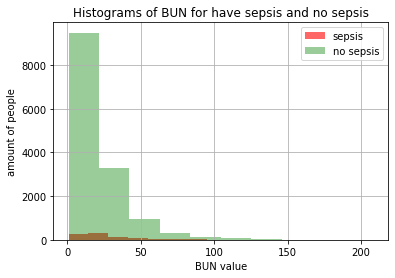


 Ttest - Check BUN parameter:
Test statistic is 8.059657
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for BUN parameter. at 0.05 level of significance.

 Wilcoxon  - Check BUN parameter in wilcoxon test:
Test statistic is 7187585.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for BUN parameter. at 0.05 level of significance.





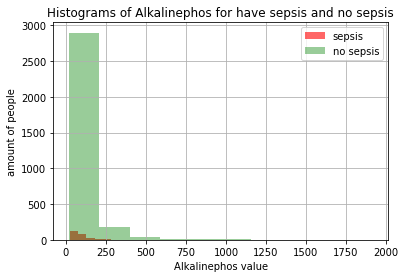


 Ttest - Check Alkalinephos parameter:
Test statistic is -0.500493
p-value for two tailed test is 0.616760
Conclusion n Since p-value(=0.616760) > alpha(=0.05) We do not reject the null hypothesis H0 for Alkalinephos parameter.

 Wilcoxon  - Check Alkalinephos parameter in wilcoxon test:
Test statistic is 402449.500000
p-value for two tailed test is 0.458888
Conclusion n Since p-value(=0.458888) > alpha(=0.05) We do not reject the null hypothesis H0 for Alkalinephos parameter.





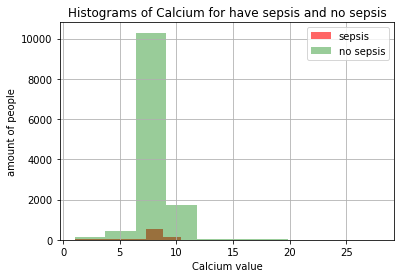


 Ttest - Check Calcium parameter:
Test statistic is -9.769018
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Calcium parameter. at 0.05 level of significance.

 Wilcoxon  - Check Calcium parameter in wilcoxon test:
Test statistic is 4258344.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Calcium parameter. at 0.05 level of significance.





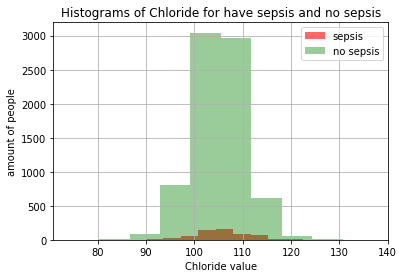


 Ttest - Check Chloride parameter:
Test statistic is 1.627093
p-value for two tailed test is 0.103756
Conclusion n Since p-value(=0.103756) > alpha(=0.05) We do not reject the null hypothesis H0 for Chloride parameter.

 Wilcoxon  - Check Chloride parameter in wilcoxon test:
Test statistic is 2347707.500000
p-value for two tailed test is 0.081692
Conclusion n Since p-value(=0.081692) > alpha(=0.05) We do not reject the null hypothesis H0 for Chloride parameter.





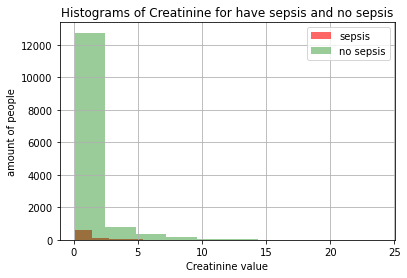


 Ttest - Check Creatinine parameter:
Test statistic is 1.922313
p-value for two tailed test is 0.054585
Conclusion n Since p-value(=0.054585) > alpha(=0.05) We do not reject the null hypothesis H0 for Creatinine parameter.

 Wilcoxon  - Check Creatinine parameter in wilcoxon test:
Test statistic is 6310030.500000
p-value for two tailed test is 0.014732
Conclusion n Since p-value(=0.014732) < alpha(=0.05) We reject the null hypothesis H0 for Creatinine parameter. at 0.05 level of significance.





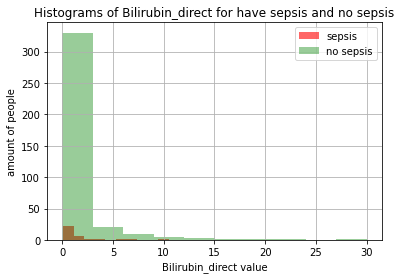


 Ttest - Check Bilirubin_direct parameter:
Test statistic is 0.495551
p-value for two tailed test is 0.620480
Conclusion n Since p-value(=0.620480) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_direct parameter.

 Wilcoxon  - Check Bilirubin_direct parameter in wilcoxon test:
Test statistic is 8312.000000
p-value for two tailed test is 0.006469
Conclusion n Since p-value(=0.006469) < alpha(=0.05) We reject the null hypothesis H0 for Bilirubin_direct parameter. at 0.05 level of significance.





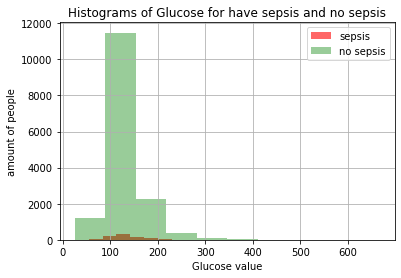


 Ttest - Check Glucose parameter:
Test statistic is 5.206576
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Glucose parameter. at 0.05 level of significance.

 Wilcoxon  - Check Glucose parameter in wilcoxon test:
Test statistic is 7982248.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Glucose parameter. at 0.05 level of significance.





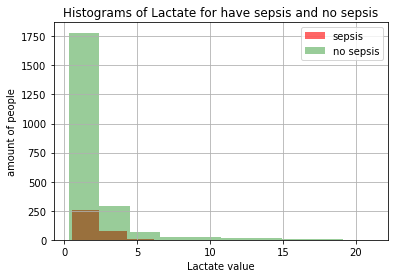


 Ttest - Check Lactate parameter:
Test statistic is -0.083821
p-value for two tailed test is 0.933205
Conclusion n Since p-value(=0.933205) > alpha(=0.05) We do not reject the null hypothesis H0 for Lactate parameter.

 Wilcoxon  - Check Lactate parameter in wilcoxon test:
Test statistic is 410670.000000
p-value for two tailed test is 0.105473
Conclusion n Since p-value(=0.105473) > alpha(=0.05) We do not reject the null hypothesis H0 for Lactate parameter.





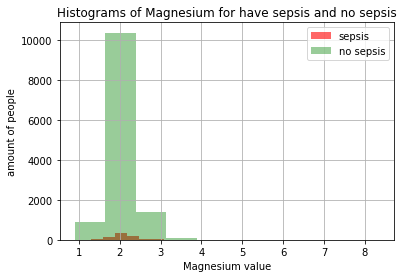


 Ttest - Check Magnesium parameter:
Test statistic is 3.205256
p-value for two tailed test is 0.001353
Conclusion n Since p-value(=0.001353) < alpha(=0.05) We reject the null hypothesis H0 for Magnesium parameter. at 0.05 level of significance.

 Wilcoxon  - Check Magnesium parameter in wilcoxon test:
Test statistic is 5599809.500000
p-value for two tailed test is 0.000240
Conclusion n Since p-value(=0.000240) < alpha(=0.05) We reject the null hypothesis H0 for Magnesium parameter. at 0.05 level of significance.





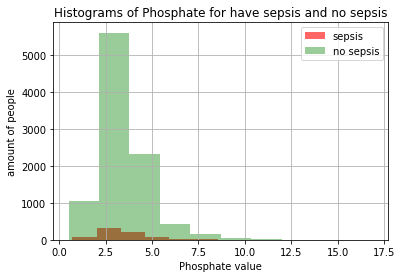


 Ttest - Check Phosphate parameter:
Test statistic is 1.153644
p-value for two tailed test is 0.248673
Conclusion n Since p-value(=0.248673) > alpha(=0.05) We do not reject the null hypothesis H0 for Phosphate parameter.

 Wilcoxon  - Check Phosphate parameter in wilcoxon test:
Test statistic is 3459569.000000
p-value for two tailed test is 0.356921
Conclusion n Since p-value(=0.356921) > alpha(=0.05) We do not reject the null hypothesis H0 for Phosphate parameter.





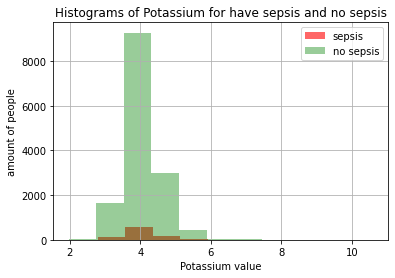


 Ttest - Check Potassium parameter:
Test statistic is -1.421788
p-value for two tailed test is 0.155108
Conclusion n Since p-value(=0.155108) > alpha(=0.05) We do not reject the null hypothesis H0 for Potassium parameter.

 Wilcoxon  - Check Potassium parameter in wilcoxon test:
Test statistic is 6053364.500000
p-value for two tailed test is 0.006588
Conclusion n Since p-value(=0.006588) < alpha(=0.05) We reject the null hypothesis H0 for Potassium parameter. at 0.05 level of significance.





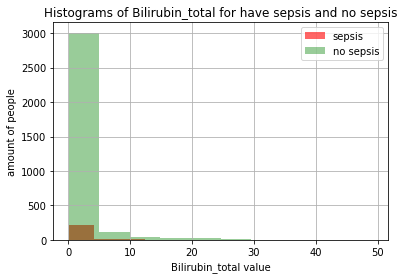


 Ttest - Check Bilirubin_total parameter:
Test statistic is 3.115949
p-value for two tailed test is 0.001848
Conclusion n Since p-value(=0.001848) < alpha(=0.05) We reject the null hypothesis H0 for Bilirubin_total parameter. at 0.05 level of significance.

 Wilcoxon  - Check Bilirubin_total parameter in wilcoxon test:
Test statistic is 438778.000000
p-value for two tailed test is 0.055420
Conclusion n Since p-value(=0.055420) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_total parameter.





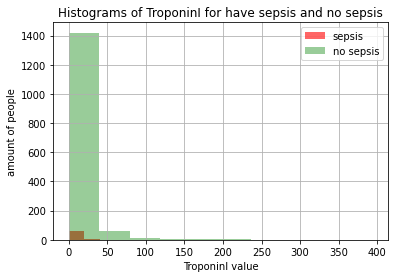


 Ttest - Check TroponinI parameter:
Test statistic is 0.994925
p-value for two tailed test is 0.319926
Conclusion n Since p-value(=0.319926) > alpha(=0.05) We do not reject the null hypothesis H0 for TroponinI parameter.

 Wilcoxon  - Check TroponinI parameter in wilcoxon test:
Test statistic is 56783.500000
p-value for two tailed test is 0.120123
Conclusion n Since p-value(=0.120123) > alpha(=0.05) We do not reject the null hypothesis H0 for TroponinI parameter.





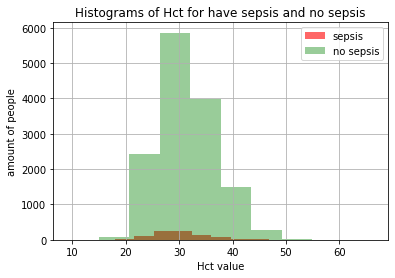


 Ttest - Check Hct parameter:
Test statistic is -4.849774
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0 for Hct parameter. at 0.05 level of significance.

 Wilcoxon  - Check Hct parameter in wilcoxon test:
Test statistic is 5660863.500000
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0 for Hct parameter. at 0.05 level of significance.





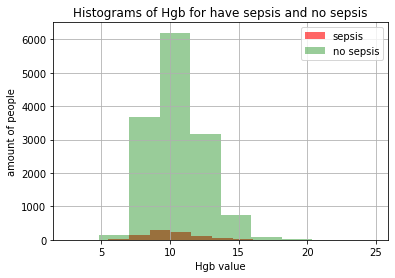


 Ttest - Check Hgb parameter:
Test statistic is -5.020884
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0 for Hgb parameter. at 0.05 level of significance.

 Wilcoxon  - Check Hgb parameter in wilcoxon test:
Test statistic is 5386141.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Hgb parameter. at 0.05 level of significance.





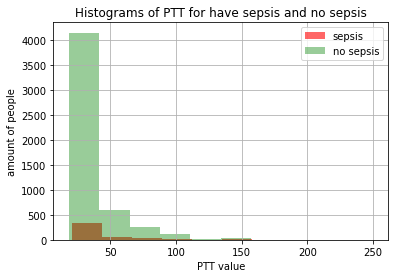


 Ttest - Check PTT parameter:
Test statistic is 3.570346
p-value for two tailed test is 0.000359
Conclusion n Since p-value(=0.000359) < alpha(=0.05) We reject the null hypothesis H0 for PTT parameter. at 0.05 level of significance.

 Wilcoxon  - Check PTT parameter in wilcoxon test:
Test statistic is 1283426.500000
p-value for two tailed test is 0.001086
Conclusion n Since p-value(=0.001086) < alpha(=0.05) We reject the null hypothesis H0 for PTT parameter. at 0.05 level of significance.





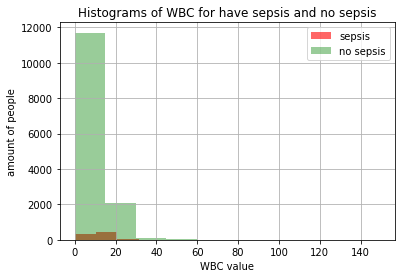


 Ttest - Check WBC parameter:
Test statistic is 8.924324
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for WBC parameter. at 0.05 level of significance.

 Wilcoxon  - Check WBC parameter in wilcoxon test:
Test statistic is 6963512.500000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for WBC parameter. at 0.05 level of significance.





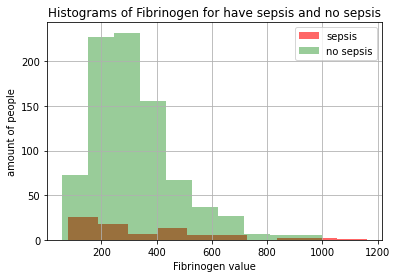


 Ttest - Check Fibrinogen parameter:
Test statistic is 1.298629
p-value for two tailed test is 0.194399
Conclusion n Since p-value(=0.194399) > alpha(=0.05) We do not reject the null hypothesis H0 for Fibrinogen parameter.

 Wilcoxon  - Check Fibrinogen parameter in wilcoxon test:
Test statistic is 31559.500000
p-value for two tailed test is 0.514956
Conclusion n Since p-value(=0.514956) > alpha(=0.05) We do not reject the null hypothesis H0 for Fibrinogen parameter.





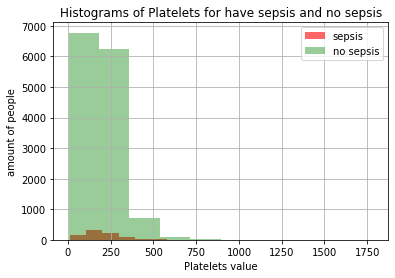


 Ttest - Check Platelets parameter:
Test statistic is 2.126074
p-value for two tailed test is 0.033514
Conclusion n Since p-value(=0.033514) < alpha(=0.05) We reject the null hypothesis H0 for Platelets parameter. at 0.05 level of significance.

 Wilcoxon  - Check Platelets parameter in wilcoxon test:
Test statistic is 5973839.500000
p-value for two tailed test is 0.515377
Conclusion n Since p-value(=0.515377) > alpha(=0.05) We do not reject the null hypothesis H0 for Platelets parameter.





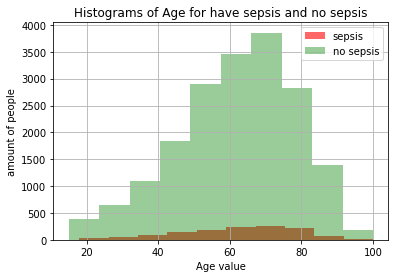


 Ttest - Check Age parameter:
Test statistic is 1.440456
p-value for two tailed test is 0.149754
Conclusion n Since p-value(=0.149754) > alpha(=0.05) We do not reject the null hypothesis H0 for Age parameter.

 Wilcoxon  - Check Age parameter in wilcoxon test:
Test statistic is 12306554.000000
p-value for two tailed test is 0.131686
Conclusion n Since p-value(=0.131686) > alpha(=0.05) We do not reject the null hypothesis H0 for Age parameter.





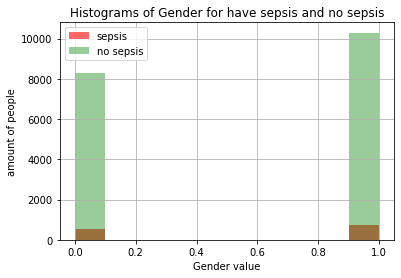


 Ttest - Check Gender parameter:
Test statistic is 1.667015
p-value for two tailed test is 0.095527
Conclusion n Since p-value(=0.095527) > alpha(=0.05) We do not reject the null hypothesis H0 for Gender parameter.

 Wilcoxon  - Check Gender parameter in wilcoxon test:
Test statistic is 12292067.000000
p-value for two tailed test is 0.095527
Conclusion n Since p-value(=0.095527) > alpha(=0.05) We do not reject the null hypothesis H0 for Gender parameter.



-------------------------------------------------------
histograms, Ttest and Wilcoxon-Test results for std of each parameter
-------------------------------------------------------


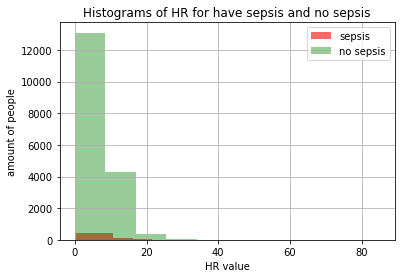


 Ttest - Check HR parameter:
Test statistic is 2.325057
p-value for two tailed test is 0.020079
Conclusion n Since p-value(=0.020079) < alpha(=0.05) We reject the null hypothesis H0 for HR parameter. at 0.05 level of significance.

 Wilcoxon  - Check HR parameter in wilcoxon test:
Test statistic is 12303692.500000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for HR parameter. at 0.05 level of significance.





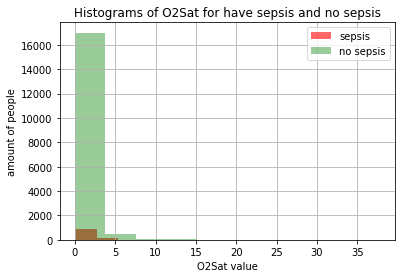


 Ttest - Check O2Sat parameter:
Test statistic is -0.551322
p-value for two tailed test is 0.581419
Conclusion n Since p-value(=0.581419) > alpha(=0.05) We do not reject the null hypothesis H0 for O2Sat parameter.

 Wilcoxon  - Check O2Sat parameter in wilcoxon test:
Test statistic is 11078426.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for O2Sat parameter. at 0.05 level of significance.





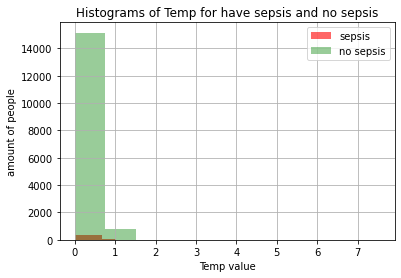


 Ttest - Check Temp parameter:
Test statistic is 7.174218
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Temp parameter. at 0.05 level of significance.

 Wilcoxon  - Check Temp parameter in wilcoxon test:
Test statistic is 10516195.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Temp parameter. at 0.05 level of significance.





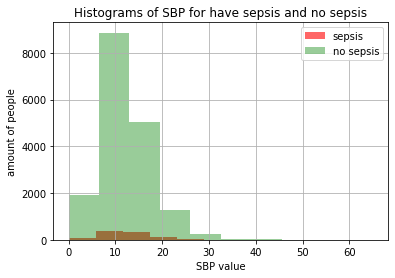


 Ttest - Check SBP parameter:
Test statistic is 5.130554
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for SBP parameter. at 0.05 level of significance.

 Wilcoxon  - Check SBP parameter in wilcoxon test:
Test statistic is 8962797.000000
p-value for two tailed test is 0.036610
Conclusion n Since p-value(=0.036610) < alpha(=0.05) We reject the null hypothesis H0 for SBP parameter. at 0.05 level of significance.





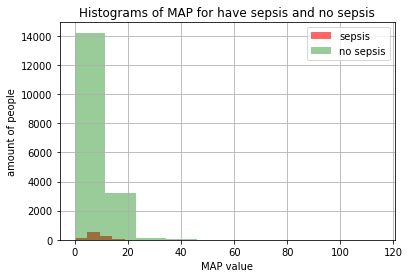


 Ttest - Check MAP parameter:
Test statistic is 1.587769
p-value for two tailed test is 0.112356
Conclusion n Since p-value(=0.112356) > alpha(=0.05) We do not reject the null hypothesis H0 for MAP parameter.

 Wilcoxon  - Check MAP parameter in wilcoxon test:
Test statistic is 9505940.500000
p-value for two tailed test is 0.000583
Conclusion n Since p-value(=0.000583) < alpha(=0.05) We reject the null hypothesis H0 for MAP parameter. at 0.05 level of significance.





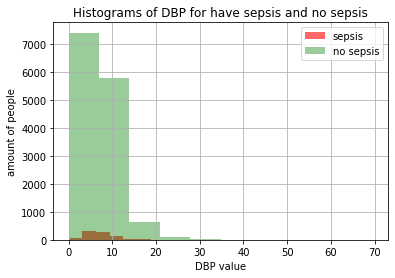


 Ttest - Check DBP parameter:
Test statistic is -0.987084
p-value for two tailed test is 0.323618
Conclusion n Since p-value(=0.323618) > alpha(=0.05) We do not reject the null hypothesis H0 for DBP parameter.

 Wilcoxon  - Check DBP parameter in wilcoxon test:
Test statistic is 5793612.000000
p-value for two tailed test is 0.000082
Conclusion n Since p-value(=0.000082) < alpha(=0.05) We reject the null hypothesis H0 for DBP parameter. at 0.05 level of significance.





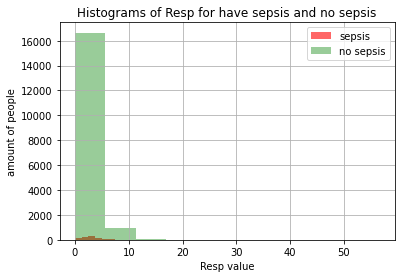


 Ttest - Check Resp parameter:
Test statistic is 0.305411
p-value for two tailed test is 0.760057
Conclusion n Since p-value(=0.760057) > alpha(=0.05) We do not reject the null hypothesis H0 for Resp parameter.

 Wilcoxon  - Check Resp parameter in wilcoxon test:
Test statistic is 11674948.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Resp parameter. at 0.05 level of significance.





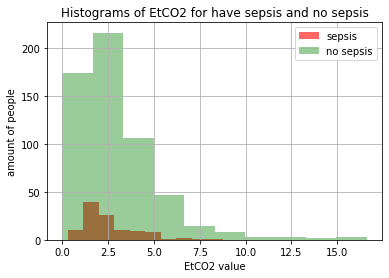


 Ttest - Check EtCO2 parameter:
Test statistic is -1.880876
p-value for two tailed test is 0.060415
Conclusion n Since p-value(=0.060415) > alpha(=0.05) We do not reject the null hypothesis H0 for EtCO2 parameter.

 Wilcoxon  - Check EtCO2 parameter in wilcoxon test:
Test statistic is 42594.500000
p-value for two tailed test is 0.664844
Conclusion n Since p-value(=0.664844) > alpha(=0.05) We do not reject the null hypothesis H0 for EtCO2 parameter.





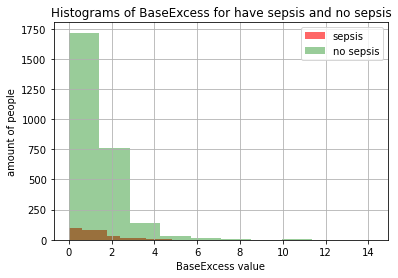


 Ttest - Check BaseExcess parameter:
Test statistic is -0.937824
p-value for two tailed test is 0.348410
Conclusion n Since p-value(=0.348410) > alpha(=0.05) We do not reject the null hypothesis H0 for BaseExcess parameter.

 Wilcoxon  - Check BaseExcess parameter in wilcoxon test:
Test statistic is 848686.500000
p-value for two tailed test is 0.019760
Conclusion n Since p-value(=0.019760) < alpha(=0.05) We reject the null hypothesis H0 for BaseExcess parameter. at 0.05 level of significance.





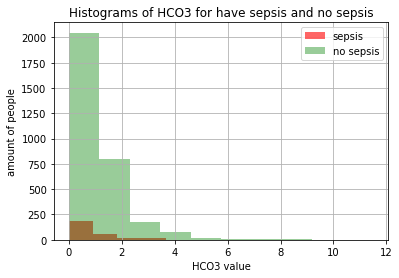


 Ttest - Check HCO3 parameter:
Test statistic is -0.492043
p-value for two tailed test is 0.622721
Conclusion n Since p-value(=0.622721) > alpha(=0.05) We do not reject the null hypothesis H0 for HCO3 parameter.

 Wilcoxon  - Check HCO3 parameter in wilcoxon test:
Test statistic is 2013805.000000
p-value for two tailed test is 0.562284
Conclusion n Since p-value(=0.562284) > alpha(=0.05) We do not reject the null hypothesis H0 for HCO3 parameter.





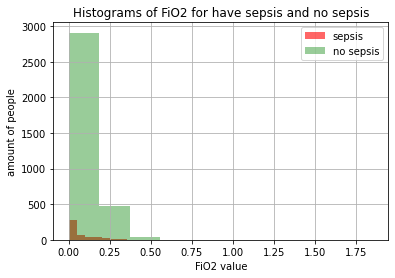


 Ttest - Check FiO2 parameter:
Test statistic is -1.277696
p-value for two tailed test is 0.201433
Conclusion n Since p-value(=0.201433) > alpha(=0.05) We do not reject the null hypothesis H0 for FiO2 parameter.

 Wilcoxon  - Check FiO2 parameter in wilcoxon test:
Test statistic is 1507641.000000
p-value for two tailed test is 0.000101
Conclusion n Since p-value(=0.000101) < alpha(=0.05) We reject the null hypothesis H0 for FiO2 parameter. at 0.05 level of significance.





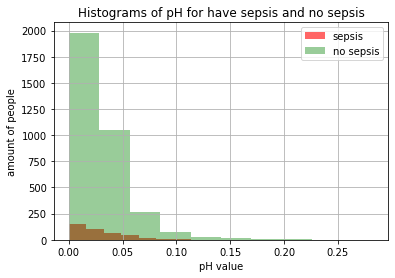


 Ttest - Check pH parameter:
Test statistic is -0.670696
p-value for two tailed test is 0.502455
Conclusion n Since p-value(=0.502455) > alpha(=0.05) We do not reject the null hypothesis H0 for pH parameter.

 Wilcoxon  - Check pH parameter in wilcoxon test:
Test statistic is 1465724.000000
p-value for two tailed test is 0.172022
Conclusion n Since p-value(=0.172022) > alpha(=0.05) We do not reject the null hypothesis H0 for pH parameter.





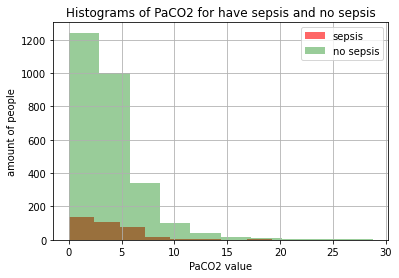


 Ttest - Check PaCO2 parameter:
Test statistic is -0.364927
p-value for two tailed test is 0.715191
Conclusion n Since p-value(=0.715191) > alpha(=0.05) We do not reject the null hypothesis H0 for PaCO2 parameter.

 Wilcoxon  - Check PaCO2 parameter in wilcoxon test:
Test statistic is 1191247.500000
p-value for two tailed test is 0.976337
Conclusion n Since p-value(=0.976337) > alpha(=0.05) We do not reject the null hypothesis H0 for PaCO2 parameter.





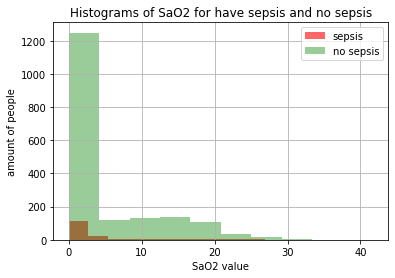


 Ttest - Check SaO2 parameter:
Test statistic is -2.043098
p-value for two tailed test is 0.041175
Conclusion n Since p-value(=0.041175) < alpha(=0.05) We reject the null hypothesis H0 for SaO2 parameter. at 0.05 level of significance.

 Wilcoxon  - Check SaO2 parameter in wilcoxon test:
Test statistic is 479035.500000
p-value for two tailed test is 0.001774
Conclusion n Since p-value(=0.001774) < alpha(=0.05) We reject the null hypothesis H0 for SaO2 parameter. at 0.05 level of significance.





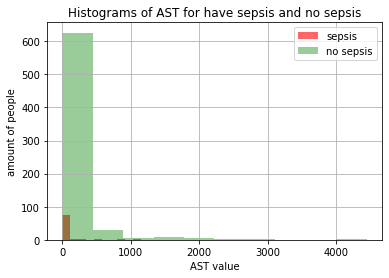


 Ttest - Check AST parameter:
Test statistic is -1.768992
p-value for two tailed test is 0.077297
Conclusion n Since p-value(=0.077297) > alpha(=0.05) We do not reject the null hypothesis H0 for AST parameter.

 Wilcoxon  - Check AST parameter in wilcoxon test:
Test statistic is 451343.000000
p-value for two tailed test is 0.011535
Conclusion n Since p-value(=0.011535) < alpha(=0.05) We reject the null hypothesis H0 for AST parameter. at 0.05 level of significance.





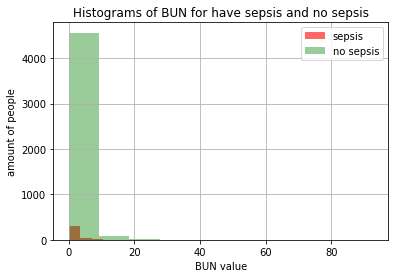


 Ttest - Check BUN parameter:
Test statistic is 0.059888
p-value for two tailed test is 0.952247
Conclusion n Since p-value(=0.952247) > alpha(=0.05) We do not reject the null hypothesis H0 for BUN parameter.

 Wilcoxon  - Check BUN parameter in wilcoxon test:
Test statistic is 7187585.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for BUN parameter. at 0.05 level of significance.





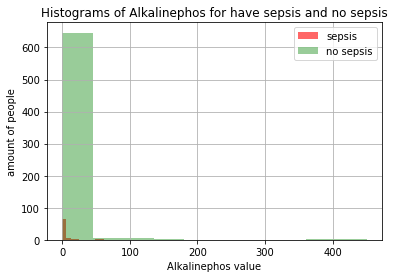


 Ttest - Check Alkalinephos parameter:
Test statistic is -1.338797
p-value for two tailed test is 0.181049
Conclusion n Since p-value(=0.181049) > alpha(=0.05) We do not reject the null hypothesis H0 for Alkalinephos parameter.

 Wilcoxon  - Check Alkalinephos parameter in wilcoxon test:
Test statistic is 402449.500000
p-value for two tailed test is 0.458888
Conclusion n Since p-value(=0.458888) > alpha(=0.05) We do not reject the null hypothesis H0 for Alkalinephos parameter.





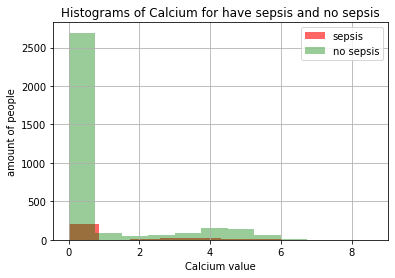


 Ttest - Check Calcium parameter:
Test statistic is 3.608232
p-value for two tailed test is 0.000312
Conclusion n Since p-value(=0.000312) < alpha(=0.05) We reject the null hypothesis H0 for Calcium parameter. at 0.05 level of significance.

 Wilcoxon  - Check Calcium parameter in wilcoxon test:
Test statistic is 4258344.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Calcium parameter. at 0.05 level of significance.





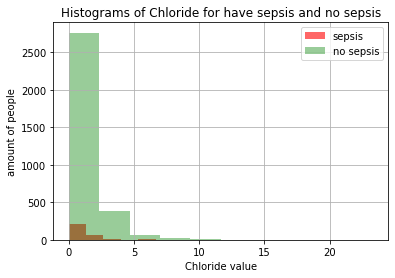


 Ttest - Check Chloride parameter:
Test statistic is -1.963334
p-value for two tailed test is 0.049686
Conclusion n Since p-value(=0.049686) < alpha(=0.05) We reject the null hypothesis H0 for Chloride parameter. at 0.05 level of significance.

 Wilcoxon  - Check Chloride parameter in wilcoxon test:
Test statistic is 2347707.500000
p-value for two tailed test is 0.081692
Conclusion n Since p-value(=0.081692) > alpha(=0.05) We do not reject the null hypothesis H0 for Chloride parameter.





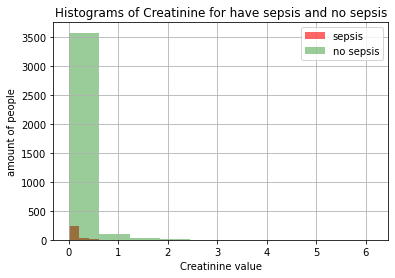


 Ttest - Check Creatinine parameter:
Test statistic is 0.031483
p-value for two tailed test is 0.974886
Conclusion n Since p-value(=0.974886) > alpha(=0.05) We do not reject the null hypothesis H0 for Creatinine parameter.

 Wilcoxon  - Check Creatinine parameter in wilcoxon test:
Test statistic is 6310030.500000
p-value for two tailed test is 0.014732
Conclusion n Since p-value(=0.014732) < alpha(=0.05) We reject the null hypothesis H0 for Creatinine parameter. at 0.05 level of significance.





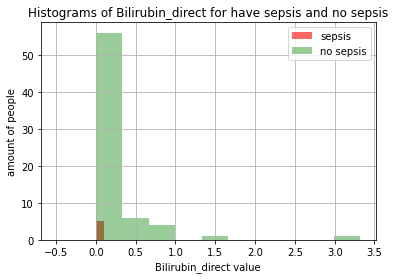


 Ttest - Check Bilirubin_direct parameter:
Test statistic is -1.081785
p-value for two tailed test is 0.283009
Conclusion n Since p-value(=0.283009) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_direct parameter.

 Wilcoxon  - Check Bilirubin_direct parameter in wilcoxon test:
Test statistic is 8312.000000
p-value for two tailed test is 0.006469
Conclusion n Since p-value(=0.006469) < alpha(=0.05) We reject the null hypothesis H0 for Bilirubin_direct parameter. at 0.05 level of significance.





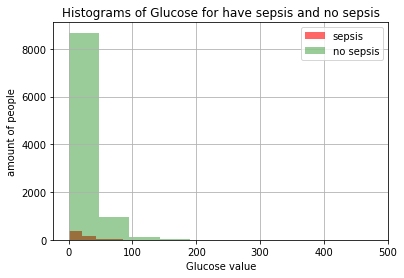


 Ttest - Check Glucose parameter:
Test statistic is -0.472219
p-value for two tailed test is 0.636780
Conclusion n Since p-value(=0.636780) > alpha(=0.05) We do not reject the null hypothesis H0 for Glucose parameter.

 Wilcoxon  - Check Glucose parameter in wilcoxon test:
Test statistic is 7982248.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Glucose parameter. at 0.05 level of significance.





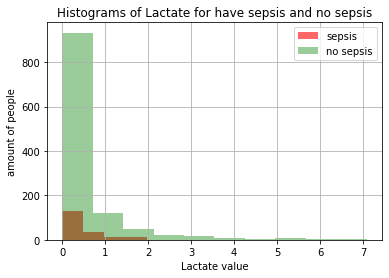


 Ttest - Check Lactate parameter:
Test statistic is -0.974763
p-value for two tailed test is 0.329851
Conclusion n Since p-value(=0.329851) > alpha(=0.05) We do not reject the null hypothesis H0 for Lactate parameter.

 Wilcoxon  - Check Lactate parameter in wilcoxon test:
Test statistic is 410670.000000
p-value for two tailed test is 0.105473
Conclusion n Since p-value(=0.105473) > alpha(=0.05) We do not reject the null hypothesis H0 for Lactate parameter.





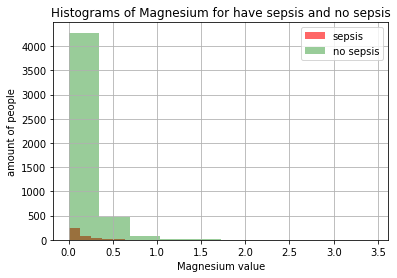


 Ttest - Check Magnesium parameter:
Test statistic is -1.482512
p-value for two tailed test is 0.138264
Conclusion n Since p-value(=0.138264) > alpha(=0.05) We do not reject the null hypothesis H0 for Magnesium parameter.

 Wilcoxon  - Check Magnesium parameter in wilcoxon test:
Test statistic is 5599809.500000
p-value for two tailed test is 0.000240
Conclusion n Since p-value(=0.000240) < alpha(=0.05) We reject the null hypothesis H0 for Magnesium parameter. at 0.05 level of significance.





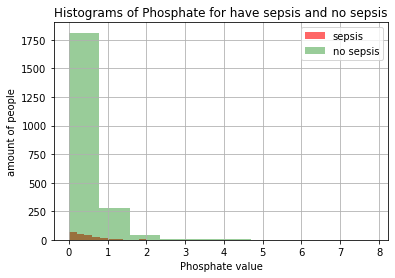


 Ttest - Check Phosphate parameter:
Test statistic is -0.975695
p-value for two tailed test is 0.329315
Conclusion n Since p-value(=0.329315) > alpha(=0.05) We do not reject the null hypothesis H0 for Phosphate parameter.

 Wilcoxon  - Check Phosphate parameter in wilcoxon test:
Test statistic is 3459569.000000
p-value for two tailed test is 0.356921
Conclusion n Since p-value(=0.356921) > alpha(=0.05) We do not reject the null hypothesis H0 for Phosphate parameter.





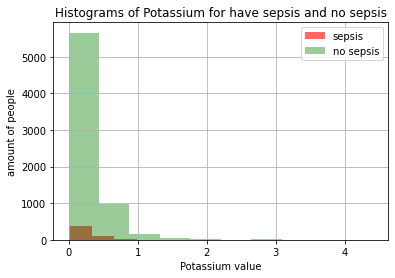


 Ttest - Check Potassium parameter:
Test statistic is -1.016060
p-value for two tailed test is 0.309634
Conclusion n Since p-value(=0.309634) > alpha(=0.05) We do not reject the null hypothesis H0 for Potassium parameter.

 Wilcoxon  - Check Potassium parameter in wilcoxon test:
Test statistic is 6053364.500000
p-value for two tailed test is 0.006588
Conclusion n Since p-value(=0.006588) < alpha(=0.05) We reject the null hypothesis H0 for Potassium parameter. at 0.05 level of significance.





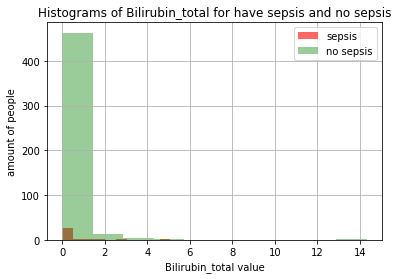


 Ttest - Check Bilirubin_total parameter:
Test statistic is 1.356339
p-value for two tailed test is 0.175585
Conclusion n Since p-value(=0.175585) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_total parameter.

 Wilcoxon  - Check Bilirubin_total parameter in wilcoxon test:
Test statistic is 438778.000000
p-value for two tailed test is 0.055420
Conclusion n Since p-value(=0.055420) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_total parameter.





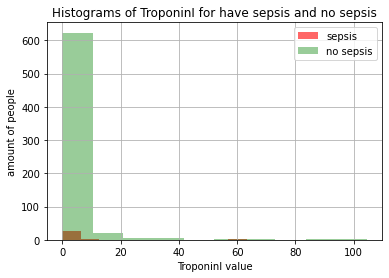


 Ttest - Check TroponinI parameter:
Test statistic is 0.845728
p-value for two tailed test is 0.398000
Conclusion n Since p-value(=0.398000) > alpha(=0.05) We do not reject the null hypothesis H0 for TroponinI parameter.

 Wilcoxon  - Check TroponinI parameter in wilcoxon test:
Test statistic is 56783.500000
p-value for two tailed test is 0.120123
Conclusion n Since p-value(=0.120123) > alpha(=0.05) We do not reject the null hypothesis H0 for TroponinI parameter.





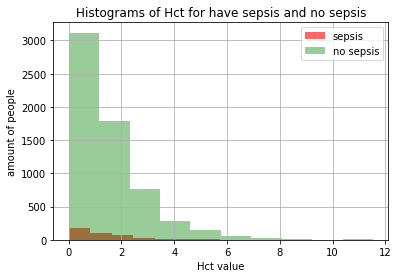


 Ttest - Check Hct parameter:
Test statistic is -2.490797
p-value for two tailed test is 0.012770
Conclusion n Since p-value(=0.012770) < alpha(=0.05) We reject the null hypothesis H0 for Hct parameter. at 0.05 level of significance.

 Wilcoxon  - Check Hct parameter in wilcoxon test:
Test statistic is 5660863.500000
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0 for Hct parameter. at 0.05 level of significance.





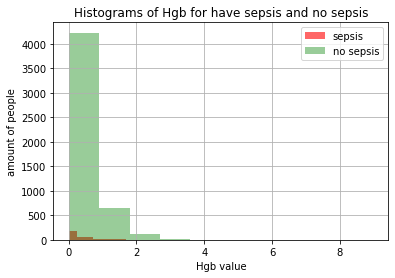


 Ttest - Check Hgb parameter:
Test statistic is -3.031266
p-value for two tailed test is 0.002447
Conclusion n Since p-value(=0.002447) < alpha(=0.05) We reject the null hypothesis H0 for Hgb parameter. at 0.05 level of significance.

 Wilcoxon  - Check Hgb parameter in wilcoxon test:
Test statistic is 5386141.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Hgb parameter. at 0.05 level of significance.





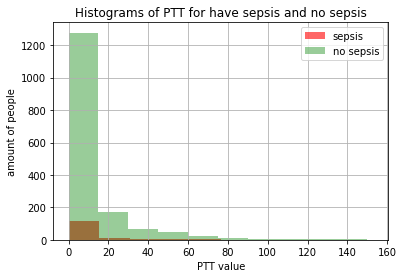


 Ttest - Check PTT parameter:
Test statistic is 0.589803
p-value for two tailed test is 0.555398
Conclusion n Since p-value(=0.555398) > alpha(=0.05) We do not reject the null hypothesis H0 for PTT parameter.

 Wilcoxon  - Check PTT parameter in wilcoxon test:
Test statistic is 1283426.500000
p-value for two tailed test is 0.001086
Conclusion n Since p-value(=0.001086) < alpha(=0.05) We reject the null hypothesis H0 for PTT parameter. at 0.05 level of significance.





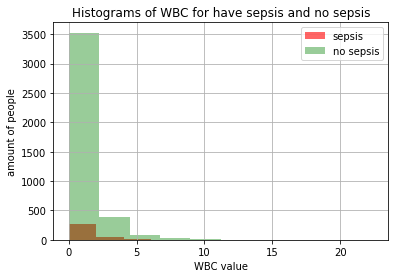


 Ttest - Check WBC parameter:
Test statistic is 0.988276
p-value for two tailed test is 0.323072
Conclusion n Since p-value(=0.323072) > alpha(=0.05) We do not reject the null hypothesis H0 for WBC parameter.

 Wilcoxon  - Check WBC parameter in wilcoxon test:
Test statistic is 6963512.500000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for WBC parameter. at 0.05 level of significance.





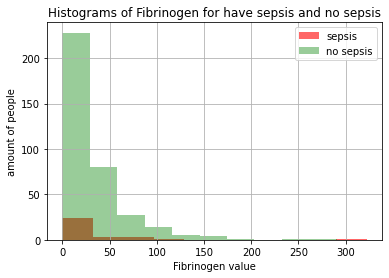


 Ttest - Check Fibrinogen parameter:
Test statistic is 0.265016
p-value for two tailed test is 0.791136
Conclusion n Since p-value(=0.791136) > alpha(=0.05) We do not reject the null hypothesis H0 for Fibrinogen parameter.

 Wilcoxon  - Check Fibrinogen parameter in wilcoxon test:
Test statistic is 31559.500000
p-value for two tailed test is 0.514956
Conclusion n Since p-value(=0.514956) > alpha(=0.05) We do not reject the null hypothesis H0 for Fibrinogen parameter.





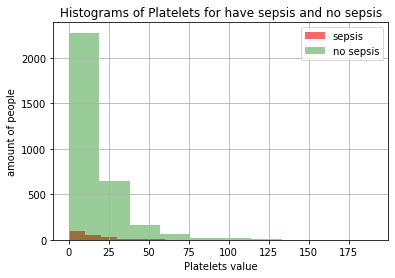


 Ttest - Check Platelets parameter:
Test statistic is 0.680175
p-value for two tailed test is 0.496440
Conclusion n Since p-value(=0.496440) > alpha(=0.05) We do not reject the null hypothesis H0 for Platelets parameter.

 Wilcoxon  - Check Platelets parameter in wilcoxon test:
Test statistic is 5973839.500000
p-value for two tailed test is 0.515377
Conclusion n Since p-value(=0.515377) > alpha(=0.05) We do not reject the null hypothesis H0 for Platelets parameter.





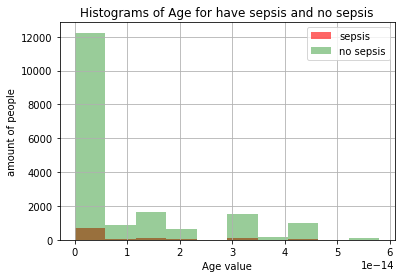


 Ttest - Check Age parameter:
Test statistic is 1.837905
p-value for two tailed test is 0.066092
Conclusion n Since p-value(=0.066092) > alpha(=0.05) We do not reject the null hypothesis H0 for Age parameter.

 Wilcoxon  - Check Age parameter in wilcoxon test:
Test statistic is 12306554.000000
p-value for two tailed test is 0.131686
Conclusion n Since p-value(=0.131686) > alpha(=0.05) We do not reject the null hypothesis H0 for Age parameter.





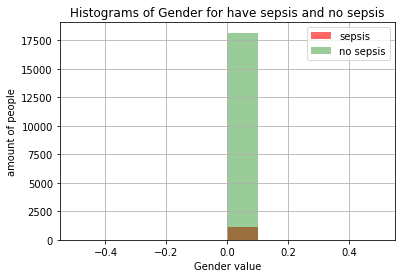


 Ttest - Check Gender parameter:
Test statistic is nan
p-value for two tailed test is nan
Conclusion n Since p-value(=nan) > alpha(=0.05) We do not reject the null hypothesis H0 for Gender parameter.

 Wilcoxon  - Check Gender parameter in wilcoxon test:
Test statistic is 12292067.000000
p-value for two tailed test is 0.095527
Conclusion n Since p-value(=0.095527) > alpha(=0.05) We do not reject the null hypothesis H0 for Gender parameter.



-------------------------------------------------------
histograms, Ttest and Wilcoxon-Test results for max of each parameter
-------------------------------------------------------


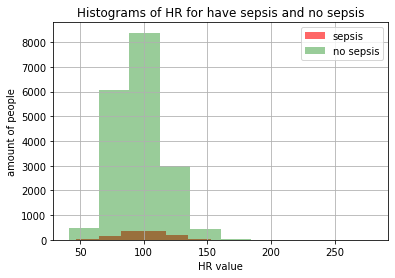


 Ttest - Check HR parameter:
Test statistic is 10.106475
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for HR parameter. at 0.05 level of significance.

 Wilcoxon  - Check HR parameter in wilcoxon test:
Test statistic is 12303692.500000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for HR parameter. at 0.05 level of significance.





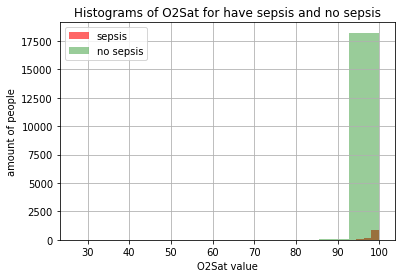


 Ttest - Check O2Sat parameter:
Test statistic is 0.859936
p-value for two tailed test is 0.389835
Conclusion n Since p-value(=0.389835) > alpha(=0.05) We do not reject the null hypothesis H0 for O2Sat parameter.

 Wilcoxon  - Check O2Sat parameter in wilcoxon test:
Test statistic is 11078426.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for O2Sat parameter. at 0.05 level of significance.





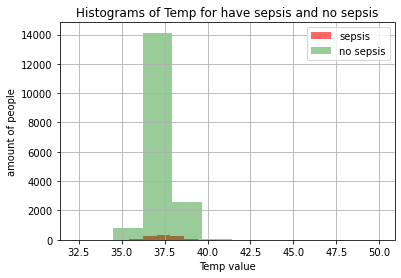


 Ttest - Check Temp parameter:
Test statistic is 10.502447
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Temp parameter. at 0.05 level of significance.

 Wilcoxon  - Check Temp parameter in wilcoxon test:
Test statistic is 10516195.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Temp parameter. at 0.05 level of significance.





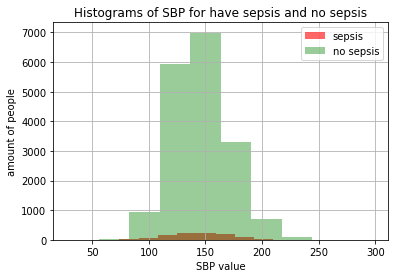


 Ttest - Check SBP parameter:
Test statistic is -0.376188
p-value for two tailed test is 0.706781
Conclusion n Since p-value(=0.706781) > alpha(=0.05) We do not reject the null hypothesis H0 for SBP parameter.

 Wilcoxon  - Check SBP parameter in wilcoxon test:
Test statistic is 8962797.000000
p-value for two tailed test is 0.036610
Conclusion n Since p-value(=0.036610) < alpha(=0.05) We reject the null hypothesis H0 for SBP parameter. at 0.05 level of significance.





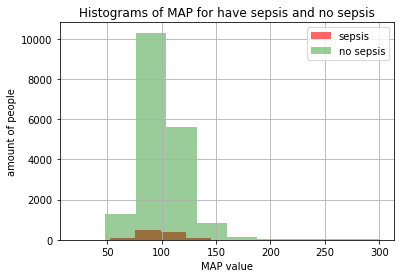


 Ttest - Check MAP parameter:
Test statistic is -2.257014
p-value for two tailed test is 0.024018
Conclusion n Since p-value(=0.024018) < alpha(=0.05) We reject the null hypothesis H0 for MAP parameter. at 0.05 level of significance.

 Wilcoxon  - Check MAP parameter in wilcoxon test:
Test statistic is 9505940.500000
p-value for two tailed test is 0.000583
Conclusion n Since p-value(=0.000583) < alpha(=0.05) We reject the null hypothesis H0 for MAP parameter. at 0.05 level of significance.





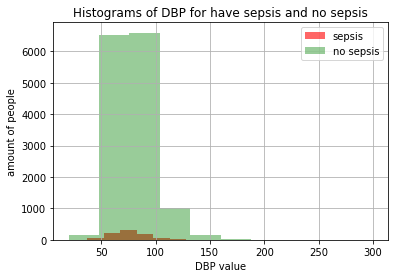


 Ttest - Check DBP parameter:
Test statistic is -3.538892
p-value for two tailed test is 0.000403
Conclusion n Since p-value(=0.000403) < alpha(=0.05) We reject the null hypothesis H0 for DBP parameter. at 0.05 level of significance.

 Wilcoxon  - Check DBP parameter in wilcoxon test:
Test statistic is 5793612.000000
p-value for two tailed test is 0.000082
Conclusion n Since p-value(=0.000082) < alpha(=0.05) We reject the null hypothesis H0 for DBP parameter. at 0.05 level of significance.





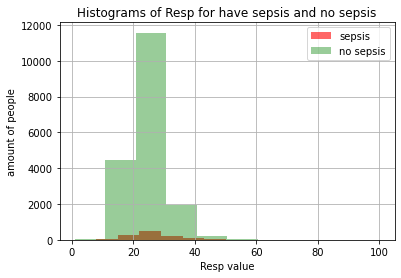


 Ttest - Check Resp parameter:
Test statistic is 5.390396
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Resp parameter. at 0.05 level of significance.

 Wilcoxon  - Check Resp parameter in wilcoxon test:
Test statistic is 11674948.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Resp parameter. at 0.05 level of significance.





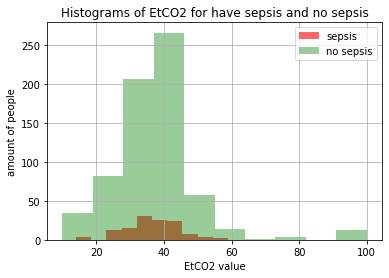


 Ttest - Check EtCO2 parameter:
Test statistic is -0.490838
p-value for two tailed test is 0.623676
Conclusion n Since p-value(=0.623676) > alpha(=0.05) We do not reject the null hypothesis H0 for EtCO2 parameter.

 Wilcoxon  - Check EtCO2 parameter in wilcoxon test:
Test statistic is 42594.500000
p-value for two tailed test is 0.664844
Conclusion n Since p-value(=0.664844) > alpha(=0.05) We do not reject the null hypothesis H0 for EtCO2 parameter.





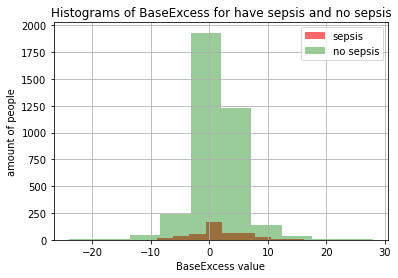


 Ttest - Check BaseExcess parameter:
Test statistic is 2.430488
p-value for two tailed test is 0.015121
Conclusion n Since p-value(=0.015121) < alpha(=0.05) We reject the null hypothesis H0 for BaseExcess parameter. at 0.05 level of significance.

 Wilcoxon  - Check BaseExcess parameter in wilcoxon test:
Test statistic is 848686.500000
p-value for two tailed test is 0.019760
Conclusion n Since p-value(=0.019760) < alpha(=0.05) We reject the null hypothesis H0 for BaseExcess parameter. at 0.05 level of significance.





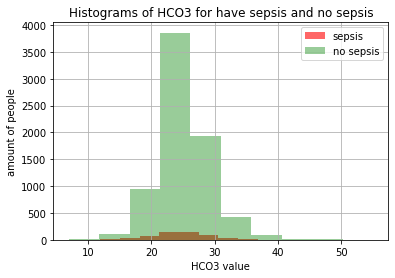


 Ttest - Check HCO3 parameter:
Test statistic is 0.298310
p-value for two tailed test is 0.765474
Conclusion n Since p-value(=0.765474) > alpha(=0.05) We do not reject the null hypothesis H0 for HCO3 parameter.

 Wilcoxon  - Check HCO3 parameter in wilcoxon test:
Test statistic is 2013805.000000
p-value for two tailed test is 0.562284
Conclusion n Since p-value(=0.562284) > alpha(=0.05) We do not reject the null hypothesis H0 for HCO3 parameter.





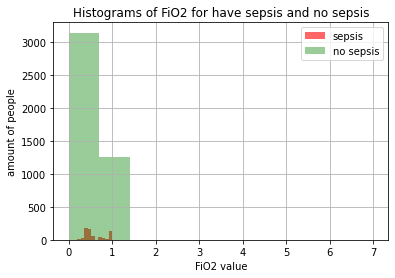


 Ttest - Check FiO2 parameter:
Test statistic is 2.863184
p-value for two tailed test is 0.004211
Conclusion n Since p-value(=0.004211) < alpha(=0.05) We reject the null hypothesis H0 for FiO2 parameter. at 0.05 level of significance.

 Wilcoxon  - Check FiO2 parameter in wilcoxon test:
Test statistic is 1507641.000000
p-value for two tailed test is 0.000101
Conclusion n Since p-value(=0.000101) < alpha(=0.05) We reject the null hypothesis H0 for FiO2 parameter. at 0.05 level of significance.





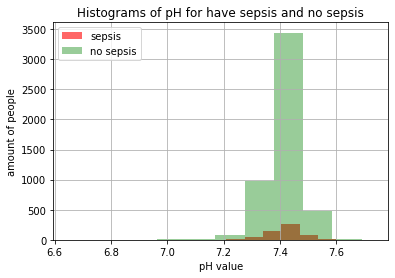


 Ttest - Check pH parameter:
Test statistic is 1.100844
p-value for two tailed test is 0.271012
Conclusion n Since p-value(=0.271012) > alpha(=0.05) We do not reject the null hypothesis H0 for pH parameter.

 Wilcoxon  - Check pH parameter in wilcoxon test:
Test statistic is 1465724.000000
p-value for two tailed test is 0.172022
Conclusion n Since p-value(=0.172022) > alpha(=0.05) We do not reject the null hypothesis H0 for pH parameter.





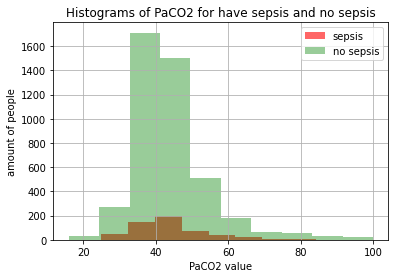


 Ttest - Check PaCO2 parameter:
Test statistic is 0.362376
p-value for two tailed test is 0.717087
Conclusion n Since p-value(=0.717087) > alpha(=0.05) We do not reject the null hypothesis H0 for PaCO2 parameter.

 Wilcoxon  - Check PaCO2 parameter in wilcoxon test:
Test statistic is 1191247.500000
p-value for two tailed test is 0.976337
Conclusion n Since p-value(=0.976337) > alpha(=0.05) We do not reject the null hypothesis H0 for PaCO2 parameter.





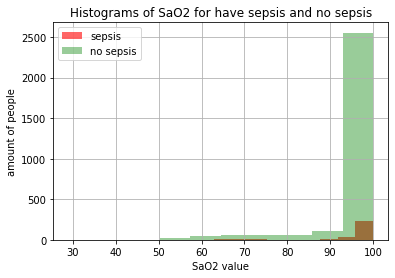


 Ttest - Check SaO2 parameter:
Test statistic is 1.619892
p-value for two tailed test is 0.105354
Conclusion n Since p-value(=0.105354) > alpha(=0.05) We do not reject the null hypothesis H0 for SaO2 parameter.

 Wilcoxon  - Check SaO2 parameter in wilcoxon test:
Test statistic is 479035.500000
p-value for two tailed test is 0.001774
Conclusion n Since p-value(=0.001774) < alpha(=0.05) We reject the null hypothesis H0 for SaO2 parameter. at 0.05 level of significance.





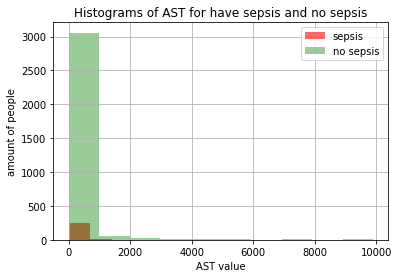


 Ttest - Check AST parameter:
Test statistic is -0.198352
p-value for two tailed test is 0.842782
Conclusion n Since p-value(=0.842782) > alpha(=0.05) We do not reject the null hypothesis H0 for AST parameter.

 Wilcoxon  - Check AST parameter in wilcoxon test:
Test statistic is 451343.000000
p-value for two tailed test is 0.011535
Conclusion n Since p-value(=0.011535) < alpha(=0.05) We reject the null hypothesis H0 for AST parameter. at 0.05 level of significance.





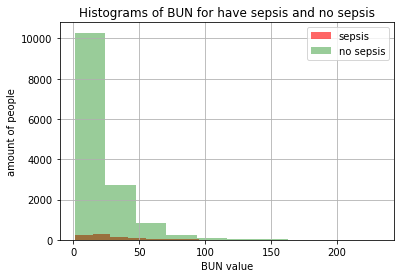


 Ttest - Check BUN parameter:
Test statistic is 8.112748
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for BUN parameter. at 0.05 level of significance.

 Wilcoxon  - Check BUN parameter in wilcoxon test:
Test statistic is 7187585.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for BUN parameter. at 0.05 level of significance.





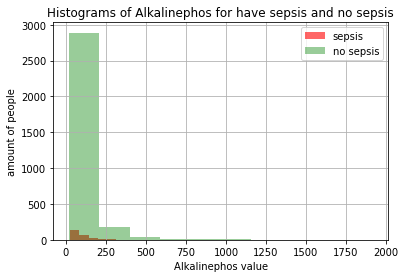


 Ttest - Check Alkalinephos parameter:
Test statistic is -0.532656
p-value for two tailed test is 0.594307
Conclusion n Since p-value(=0.594307) > alpha(=0.05) We do not reject the null hypothesis H0 for Alkalinephos parameter.

 Wilcoxon  - Check Alkalinephos parameter in wilcoxon test:
Test statistic is 402449.500000
p-value for two tailed test is 0.458888
Conclusion n Since p-value(=0.458888) > alpha(=0.05) We do not reject the null hypothesis H0 for Alkalinephos parameter.





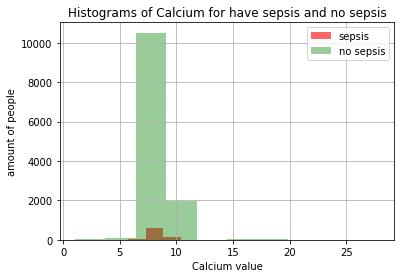


 Ttest - Check Calcium parameter:
Test statistic is -5.689790
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Calcium parameter. at 0.05 level of significance.

 Wilcoxon  - Check Calcium parameter in wilcoxon test:
Test statistic is 4258344.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Calcium parameter. at 0.05 level of significance.





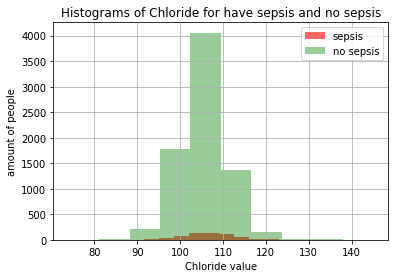


 Ttest - Check Chloride parameter:
Test statistic is 1.664018
p-value for two tailed test is 0.096147
Conclusion n Since p-value(=0.096147) > alpha(=0.05) We do not reject the null hypothesis H0 for Chloride parameter.

 Wilcoxon  - Check Chloride parameter in wilcoxon test:
Test statistic is 2347707.500000
p-value for two tailed test is 0.081692
Conclusion n Since p-value(=0.081692) > alpha(=0.05) We do not reject the null hypothesis H0 for Chloride parameter.





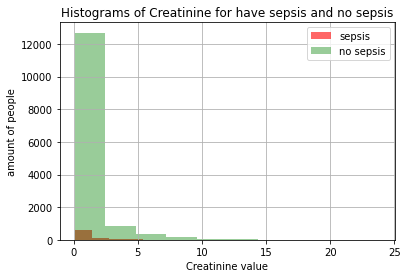


 Ttest - Check Creatinine parameter:
Test statistic is 2.046044
p-value for two tailed test is 0.040769
Conclusion n Since p-value(=0.040769) < alpha(=0.05) We reject the null hypothesis H0 for Creatinine parameter. at 0.05 level of significance.

 Wilcoxon  - Check Creatinine parameter in wilcoxon test:
Test statistic is 6310030.500000
p-value for two tailed test is 0.014732
Conclusion n Since p-value(=0.014732) < alpha(=0.05) We reject the null hypothesis H0 for Creatinine parameter. at 0.05 level of significance.





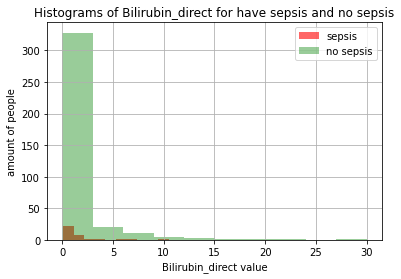


 Ttest - Check Bilirubin_direct parameter:
Test statistic is 0.424867
p-value for two tailed test is 0.671159
Conclusion n Since p-value(=0.671159) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_direct parameter.

 Wilcoxon  - Check Bilirubin_direct parameter in wilcoxon test:
Test statistic is 8312.000000
p-value for two tailed test is 0.006469
Conclusion n Since p-value(=0.006469) < alpha(=0.05) We reject the null hypothesis H0 for Bilirubin_direct parameter. at 0.05 level of significance.





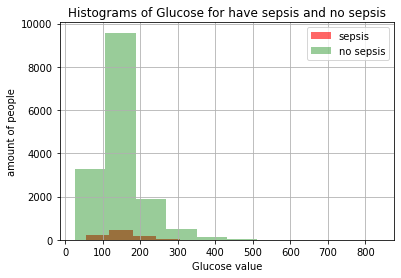


 Ttest - Check Glucose parameter:
Test statistic is 3.245779
p-value for two tailed test is 0.001174
Conclusion n Since p-value(=0.001174) < alpha(=0.05) We reject the null hypothesis H0 for Glucose parameter. at 0.05 level of significance.

 Wilcoxon  - Check Glucose parameter in wilcoxon test:
Test statistic is 7982248.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Glucose parameter. at 0.05 level of significance.





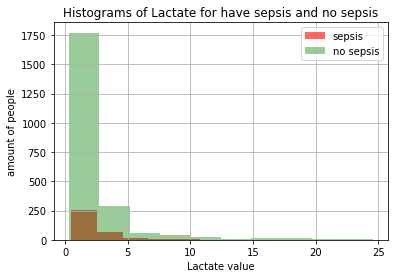


 Ttest - Check Lactate parameter:
Test statistic is -0.190207
p-value for two tailed test is 0.849162
Conclusion n Since p-value(=0.849162) > alpha(=0.05) We do not reject the null hypothesis H0 for Lactate parameter.

 Wilcoxon  - Check Lactate parameter in wilcoxon test:
Test statistic is 410670.000000
p-value for two tailed test is 0.105473
Conclusion n Since p-value(=0.105473) > alpha(=0.05) We do not reject the null hypothesis H0 for Lactate parameter.





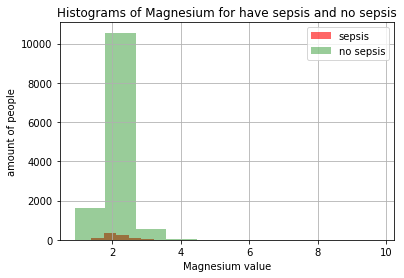


 Ttest - Check Magnesium parameter:
Test statistic is 3.346365
p-value for two tailed test is 0.000821
Conclusion n Since p-value(=0.000821) < alpha(=0.05) We reject the null hypothesis H0 for Magnesium parameter. at 0.05 level of significance.

 Wilcoxon  - Check Magnesium parameter in wilcoxon test:
Test statistic is 5599809.500000
p-value for two tailed test is 0.000240
Conclusion n Since p-value(=0.000240) < alpha(=0.05) We reject the null hypothesis H0 for Magnesium parameter. at 0.05 level of significance.





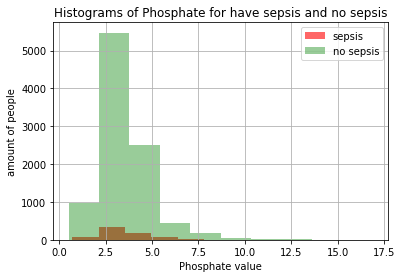


 Ttest - Check Phosphate parameter:
Test statistic is 1.564374
p-value for two tailed test is 0.117760
Conclusion n Since p-value(=0.117760) > alpha(=0.05) We do not reject the null hypothesis H0 for Phosphate parameter.

 Wilcoxon  - Check Phosphate parameter in wilcoxon test:
Test statistic is 3459569.000000
p-value for two tailed test is 0.356921
Conclusion n Since p-value(=0.356921) > alpha(=0.05) We do not reject the null hypothesis H0 for Phosphate parameter.





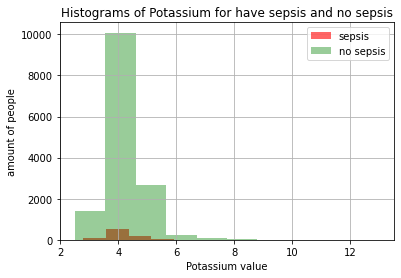


 Ttest - Check Potassium parameter:
Test statistic is 0.029304
p-value for two tailed test is 0.976623
Conclusion n Since p-value(=0.976623) > alpha(=0.05) We do not reject the null hypothesis H0 for Potassium parameter.

 Wilcoxon  - Check Potassium parameter in wilcoxon test:
Test statistic is 6053364.500000
p-value for two tailed test is 0.006588
Conclusion n Since p-value(=0.006588) < alpha(=0.05) We reject the null hypothesis H0 for Potassium parameter. at 0.05 level of significance.





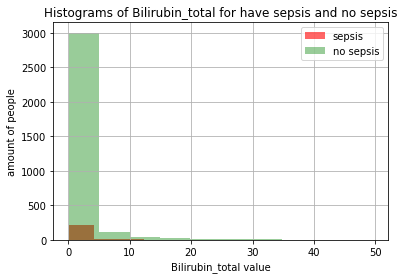


 Ttest - Check Bilirubin_total parameter:
Test statistic is 3.109004
p-value for two tailed test is 0.001892
Conclusion n Since p-value(=0.001892) < alpha(=0.05) We reject the null hypothesis H0 for Bilirubin_total parameter. at 0.05 level of significance.

 Wilcoxon  - Check Bilirubin_total parameter in wilcoxon test:
Test statistic is 438778.000000
p-value for two tailed test is 0.055420
Conclusion n Since p-value(=0.055420) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_total parameter.





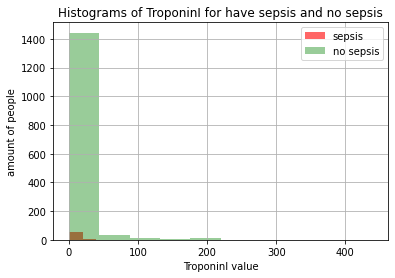


 Ttest - Check TroponinI parameter:
Test statistic is 1.130453
p-value for two tailed test is 0.258458
Conclusion n Since p-value(=0.258458) > alpha(=0.05) We do not reject the null hypothesis H0 for TroponinI parameter.

 Wilcoxon  - Check TroponinI parameter in wilcoxon test:
Test statistic is 56783.500000
p-value for two tailed test is 0.120123
Conclusion n Since p-value(=0.120123) > alpha(=0.05) We do not reject the null hypothesis H0 for TroponinI parameter.





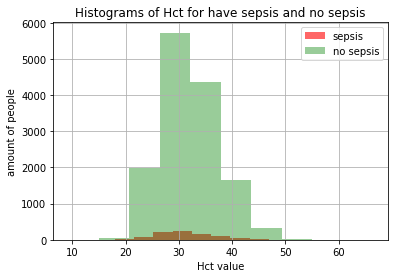


 Ttest - Check Hct parameter:
Test statistic is -4.974794
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0 for Hct parameter. at 0.05 level of significance.

 Wilcoxon  - Check Hct parameter in wilcoxon test:
Test statistic is 5660863.500000
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0 for Hct parameter. at 0.05 level of significance.





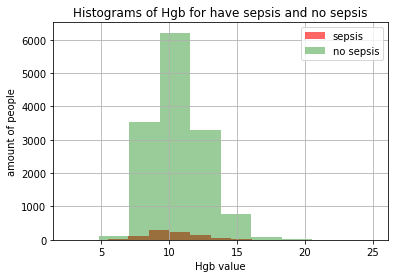


 Ttest - Check Hgb parameter:
Test statistic is -5.100564
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Hgb parameter. at 0.05 level of significance.

 Wilcoxon  - Check Hgb parameter in wilcoxon test:
Test statistic is 5386141.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Hgb parameter. at 0.05 level of significance.





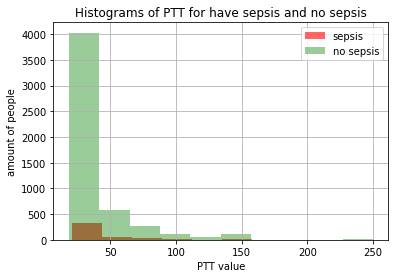


 Ttest - Check PTT parameter:
Test statistic is 2.848379
p-value for two tailed test is 0.004410
Conclusion n Since p-value(=0.004410) < alpha(=0.05) We reject the null hypothesis H0 for PTT parameter. at 0.05 level of significance.

 Wilcoxon  - Check PTT parameter in wilcoxon test:
Test statistic is 1283426.500000
p-value for two tailed test is 0.001086
Conclusion n Since p-value(=0.001086) < alpha(=0.05) We reject the null hypothesis H0 for PTT parameter. at 0.05 level of significance.





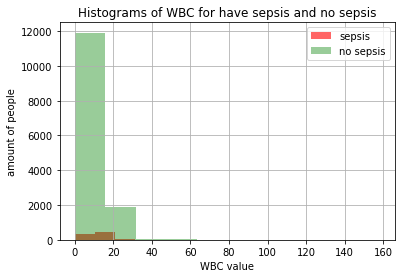


 Ttest - Check WBC parameter:
Test statistic is 9.047368
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for WBC parameter. at 0.05 level of significance.

 Wilcoxon  - Check WBC parameter in wilcoxon test:
Test statistic is 6963512.500000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for WBC parameter. at 0.05 level of significance.





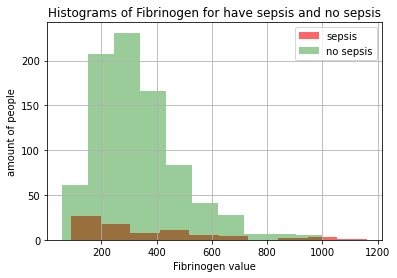


 Ttest - Check Fibrinogen parameter:
Test statistic is 1.257858
p-value for two tailed test is 0.208765
Conclusion n Since p-value(=0.208765) > alpha(=0.05) We do not reject the null hypothesis H0 for Fibrinogen parameter.

 Wilcoxon  - Check Fibrinogen parameter in wilcoxon test:
Test statistic is 31559.500000
p-value for two tailed test is 0.514956
Conclusion n Since p-value(=0.514956) > alpha(=0.05) We do not reject the null hypothesis H0 for Fibrinogen parameter.





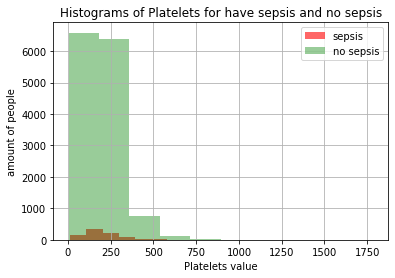


 Ttest - Check Platelets parameter:
Test statistic is 2.276670
p-value for two tailed test is 0.022820
Conclusion n Since p-value(=0.022820) < alpha(=0.05) We reject the null hypothesis H0 for Platelets parameter. at 0.05 level of significance.

 Wilcoxon  - Check Platelets parameter in wilcoxon test:
Test statistic is 5973839.500000
p-value for two tailed test is 0.515377
Conclusion n Since p-value(=0.515377) > alpha(=0.05) We do not reject the null hypothesis H0 for Platelets parameter.





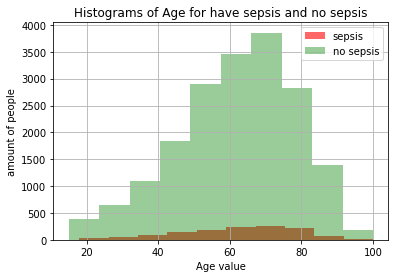


 Ttest - Check Age parameter:
Test statistic is 1.440456
p-value for two tailed test is 0.149754
Conclusion n Since p-value(=0.149754) > alpha(=0.05) We do not reject the null hypothesis H0 for Age parameter.

 Wilcoxon  - Check Age parameter in wilcoxon test:
Test statistic is 12306554.000000
p-value for two tailed test is 0.131686
Conclusion n Since p-value(=0.131686) > alpha(=0.05) We do not reject the null hypothesis H0 for Age parameter.





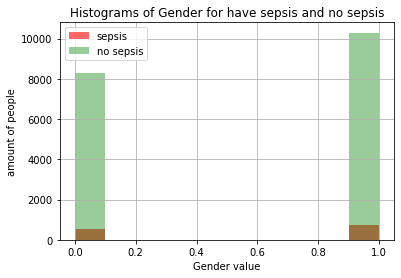


 Ttest - Check Gender parameter:
Test statistic is 1.667015
p-value for two tailed test is 0.095527
Conclusion n Since p-value(=0.095527) > alpha(=0.05) We do not reject the null hypothesis H0 for Gender parameter.

 Wilcoxon  - Check Gender parameter in wilcoxon test:
Test statistic is 12292067.000000
p-value for two tailed test is 0.095527
Conclusion n Since p-value(=0.095527) > alpha(=0.05) We do not reject the null hypothesis H0 for Gender parameter.



-------------------------------------------------------
histograms, Ttest and Wilcoxon-Test results for min of each parameter
-------------------------------------------------------


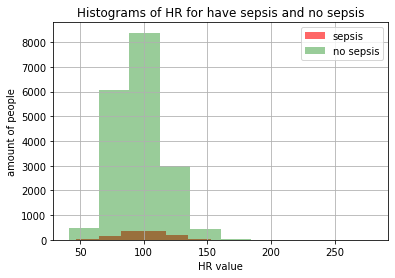


 Ttest - Check HR parameter:
Test statistic is 10.106475
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for HR parameter. at 0.05 level of significance.

 Wilcoxon  - Check HR parameter in wilcoxon test:
Test statistic is 12303692.500000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for HR parameter. at 0.05 level of significance.





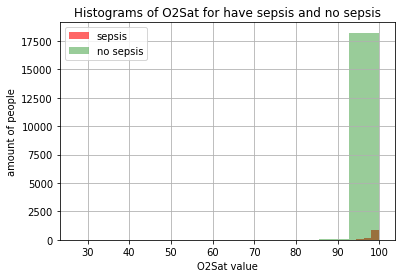


 Ttest - Check O2Sat parameter:
Test statistic is 0.859936
p-value for two tailed test is 0.389835
Conclusion n Since p-value(=0.389835) > alpha(=0.05) We do not reject the null hypothesis H0 for O2Sat parameter.

 Wilcoxon  - Check O2Sat parameter in wilcoxon test:
Test statistic is 11078426.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for O2Sat parameter. at 0.05 level of significance.





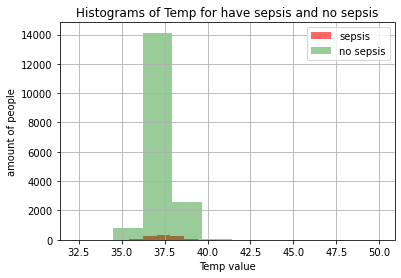


 Ttest - Check Temp parameter:
Test statistic is 10.502447
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Temp parameter. at 0.05 level of significance.

 Wilcoxon  - Check Temp parameter in wilcoxon test:
Test statistic is 10516195.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Temp parameter. at 0.05 level of significance.





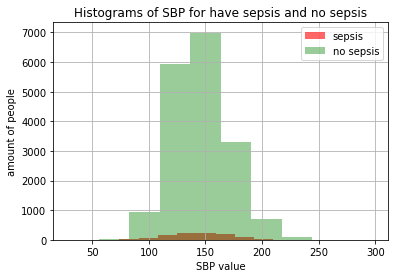


 Ttest - Check SBP parameter:
Test statistic is -0.376188
p-value for two tailed test is 0.706781
Conclusion n Since p-value(=0.706781) > alpha(=0.05) We do not reject the null hypothesis H0 for SBP parameter.

 Wilcoxon  - Check SBP parameter in wilcoxon test:
Test statistic is 8962797.000000
p-value for two tailed test is 0.036610
Conclusion n Since p-value(=0.036610) < alpha(=0.05) We reject the null hypothesis H0 for SBP parameter. at 0.05 level of significance.





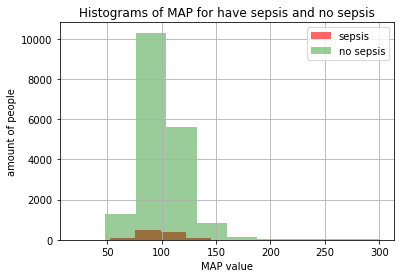


 Ttest - Check MAP parameter:
Test statistic is -2.257014
p-value for two tailed test is 0.024018
Conclusion n Since p-value(=0.024018) < alpha(=0.05) We reject the null hypothesis H0 for MAP parameter. at 0.05 level of significance.

 Wilcoxon  - Check MAP parameter in wilcoxon test:
Test statistic is 9505940.500000
p-value for two tailed test is 0.000583
Conclusion n Since p-value(=0.000583) < alpha(=0.05) We reject the null hypothesis H0 for MAP parameter. at 0.05 level of significance.





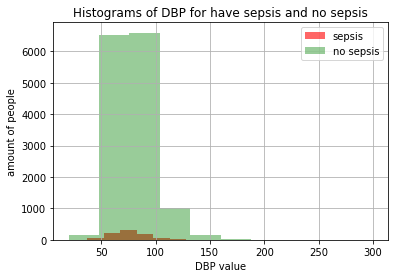


 Ttest - Check DBP parameter:
Test statistic is -3.538892
p-value for two tailed test is 0.000403
Conclusion n Since p-value(=0.000403) < alpha(=0.05) We reject the null hypothesis H0 for DBP parameter. at 0.05 level of significance.

 Wilcoxon  - Check DBP parameter in wilcoxon test:
Test statistic is 5793612.000000
p-value for two tailed test is 0.000082
Conclusion n Since p-value(=0.000082) < alpha(=0.05) We reject the null hypothesis H0 for DBP parameter. at 0.05 level of significance.





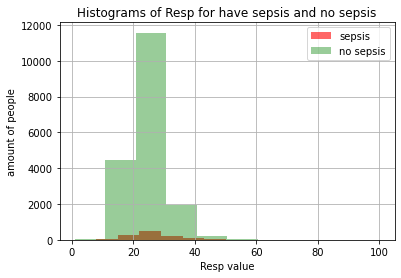


 Ttest - Check Resp parameter:
Test statistic is 5.390396
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Resp parameter. at 0.05 level of significance.

 Wilcoxon  - Check Resp parameter in wilcoxon test:
Test statistic is 11674948.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Resp parameter. at 0.05 level of significance.





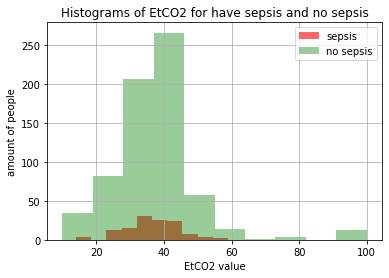


 Ttest - Check EtCO2 parameter:
Test statistic is -0.490838
p-value for two tailed test is 0.623676
Conclusion n Since p-value(=0.623676) > alpha(=0.05) We do not reject the null hypothesis H0 for EtCO2 parameter.

 Wilcoxon  - Check EtCO2 parameter in wilcoxon test:
Test statistic is 42594.500000
p-value for two tailed test is 0.664844
Conclusion n Since p-value(=0.664844) > alpha(=0.05) We do not reject the null hypothesis H0 for EtCO2 parameter.





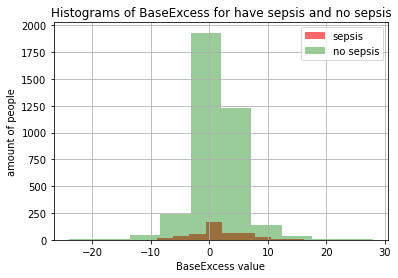


 Ttest - Check BaseExcess parameter:
Test statistic is 2.430488
p-value for two tailed test is 0.015121
Conclusion n Since p-value(=0.015121) < alpha(=0.05) We reject the null hypothesis H0 for BaseExcess parameter. at 0.05 level of significance.

 Wilcoxon  - Check BaseExcess parameter in wilcoxon test:
Test statistic is 848686.500000
p-value for two tailed test is 0.019760
Conclusion n Since p-value(=0.019760) < alpha(=0.05) We reject the null hypothesis H0 for BaseExcess parameter. at 0.05 level of significance.





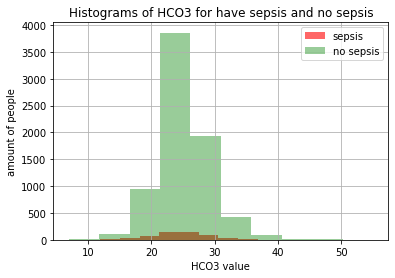


 Ttest - Check HCO3 parameter:
Test statistic is 0.298310
p-value for two tailed test is 0.765474
Conclusion n Since p-value(=0.765474) > alpha(=0.05) We do not reject the null hypothesis H0 for HCO3 parameter.

 Wilcoxon  - Check HCO3 parameter in wilcoxon test:
Test statistic is 2013805.000000
p-value for two tailed test is 0.562284
Conclusion n Since p-value(=0.562284) > alpha(=0.05) We do not reject the null hypothesis H0 for HCO3 parameter.





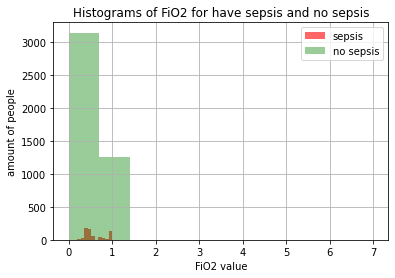


 Ttest - Check FiO2 parameter:
Test statistic is 2.863184
p-value for two tailed test is 0.004211
Conclusion n Since p-value(=0.004211) < alpha(=0.05) We reject the null hypothesis H0 for FiO2 parameter. at 0.05 level of significance.

 Wilcoxon  - Check FiO2 parameter in wilcoxon test:
Test statistic is 1507641.000000
p-value for two tailed test is 0.000101
Conclusion n Since p-value(=0.000101) < alpha(=0.05) We reject the null hypothesis H0 for FiO2 parameter. at 0.05 level of significance.





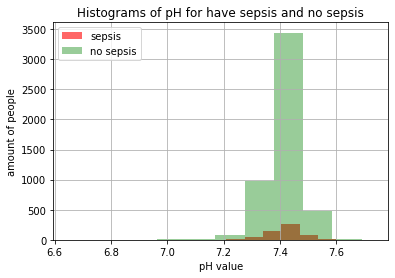


 Ttest - Check pH parameter:
Test statistic is 1.100844
p-value for two tailed test is 0.271012
Conclusion n Since p-value(=0.271012) > alpha(=0.05) We do not reject the null hypothesis H0 for pH parameter.

 Wilcoxon  - Check pH parameter in wilcoxon test:
Test statistic is 1465724.000000
p-value for two tailed test is 0.172022
Conclusion n Since p-value(=0.172022) > alpha(=0.05) We do not reject the null hypothesis H0 for pH parameter.





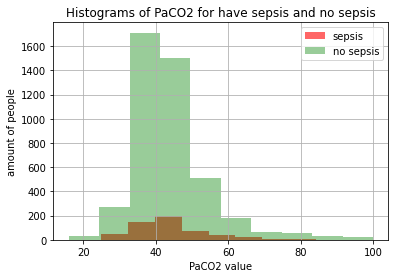


 Ttest - Check PaCO2 parameter:
Test statistic is 0.362376
p-value for two tailed test is 0.717087
Conclusion n Since p-value(=0.717087) > alpha(=0.05) We do not reject the null hypothesis H0 for PaCO2 parameter.

 Wilcoxon  - Check PaCO2 parameter in wilcoxon test:
Test statistic is 1191247.500000
p-value for two tailed test is 0.976337
Conclusion n Since p-value(=0.976337) > alpha(=0.05) We do not reject the null hypothesis H0 for PaCO2 parameter.





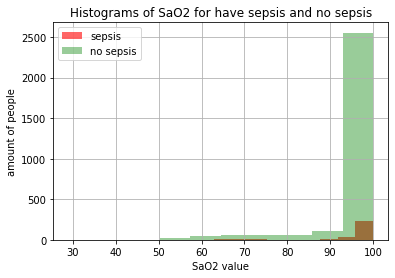


 Ttest - Check SaO2 parameter:
Test statistic is 1.619892
p-value for two tailed test is 0.105354
Conclusion n Since p-value(=0.105354) > alpha(=0.05) We do not reject the null hypothesis H0 for SaO2 parameter.

 Wilcoxon  - Check SaO2 parameter in wilcoxon test:
Test statistic is 479035.500000
p-value for two tailed test is 0.001774
Conclusion n Since p-value(=0.001774) < alpha(=0.05) We reject the null hypothesis H0 for SaO2 parameter. at 0.05 level of significance.





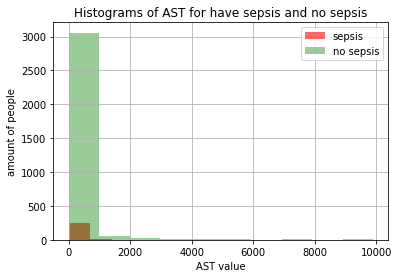


 Ttest - Check AST parameter:
Test statistic is -0.198352
p-value for two tailed test is 0.842782
Conclusion n Since p-value(=0.842782) > alpha(=0.05) We do not reject the null hypothesis H0 for AST parameter.

 Wilcoxon  - Check AST parameter in wilcoxon test:
Test statistic is 451343.000000
p-value for two tailed test is 0.011535
Conclusion n Since p-value(=0.011535) < alpha(=0.05) We reject the null hypothesis H0 for AST parameter. at 0.05 level of significance.





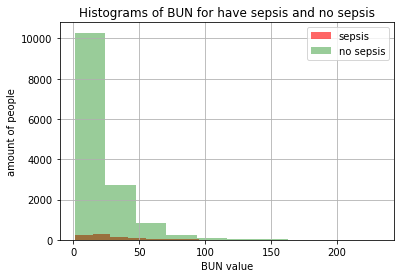


 Ttest - Check BUN parameter:
Test statistic is 8.112748
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for BUN parameter. at 0.05 level of significance.

 Wilcoxon  - Check BUN parameter in wilcoxon test:
Test statistic is 7187585.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for BUN parameter. at 0.05 level of significance.





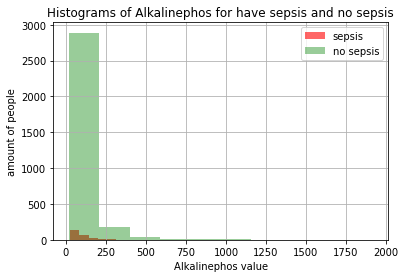


 Ttest - Check Alkalinephos parameter:
Test statistic is -0.532656
p-value for two tailed test is 0.594307
Conclusion n Since p-value(=0.594307) > alpha(=0.05) We do not reject the null hypothesis H0 for Alkalinephos parameter.

 Wilcoxon  - Check Alkalinephos parameter in wilcoxon test:
Test statistic is 402449.500000
p-value for two tailed test is 0.458888
Conclusion n Since p-value(=0.458888) > alpha(=0.05) We do not reject the null hypothesis H0 for Alkalinephos parameter.





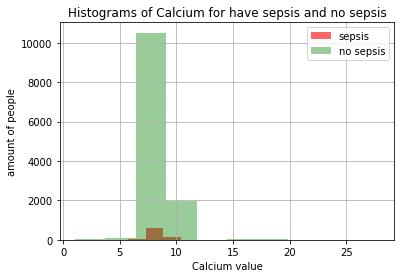


 Ttest - Check Calcium parameter:
Test statistic is -5.689790
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Calcium parameter. at 0.05 level of significance.

 Wilcoxon  - Check Calcium parameter in wilcoxon test:
Test statistic is 4258344.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Calcium parameter. at 0.05 level of significance.





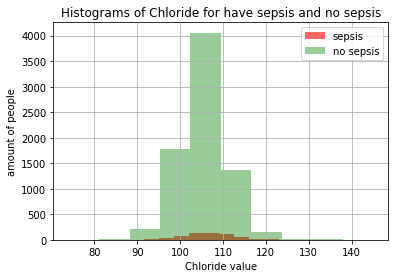


 Ttest - Check Chloride parameter:
Test statistic is 1.664018
p-value for two tailed test is 0.096147
Conclusion n Since p-value(=0.096147) > alpha(=0.05) We do not reject the null hypothesis H0 for Chloride parameter.

 Wilcoxon  - Check Chloride parameter in wilcoxon test:
Test statistic is 2347707.500000
p-value for two tailed test is 0.081692
Conclusion n Since p-value(=0.081692) > alpha(=0.05) We do not reject the null hypothesis H0 for Chloride parameter.





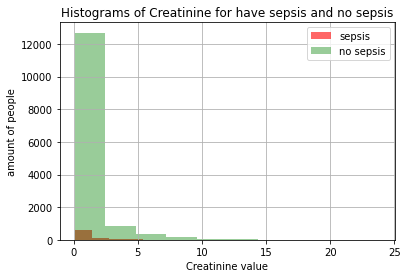


 Ttest - Check Creatinine parameter:
Test statistic is 2.046044
p-value for two tailed test is 0.040769
Conclusion n Since p-value(=0.040769) < alpha(=0.05) We reject the null hypothesis H0 for Creatinine parameter. at 0.05 level of significance.

 Wilcoxon  - Check Creatinine parameter in wilcoxon test:
Test statistic is 6310030.500000
p-value for two tailed test is 0.014732
Conclusion n Since p-value(=0.014732) < alpha(=0.05) We reject the null hypothesis H0 for Creatinine parameter. at 0.05 level of significance.





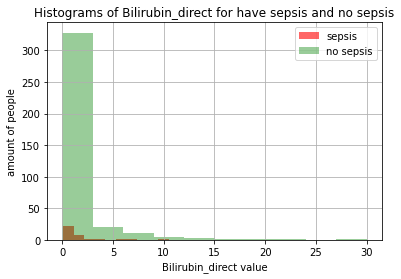


 Ttest - Check Bilirubin_direct parameter:
Test statistic is 0.424867
p-value for two tailed test is 0.671159
Conclusion n Since p-value(=0.671159) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_direct parameter.

 Wilcoxon  - Check Bilirubin_direct parameter in wilcoxon test:
Test statistic is 8312.000000
p-value for two tailed test is 0.006469
Conclusion n Since p-value(=0.006469) < alpha(=0.05) We reject the null hypothesis H0 for Bilirubin_direct parameter. at 0.05 level of significance.





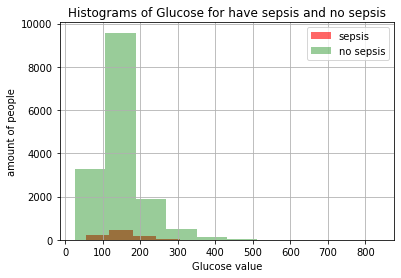


 Ttest - Check Glucose parameter:
Test statistic is 3.245779
p-value for two tailed test is 0.001174
Conclusion n Since p-value(=0.001174) < alpha(=0.05) We reject the null hypothesis H0 for Glucose parameter. at 0.05 level of significance.

 Wilcoxon  - Check Glucose parameter in wilcoxon test:
Test statistic is 7982248.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Glucose parameter. at 0.05 level of significance.





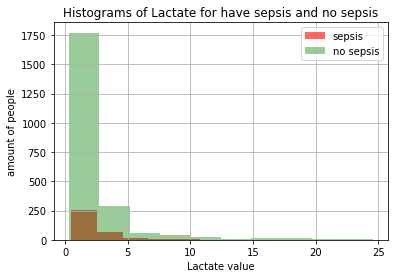


 Ttest - Check Lactate parameter:
Test statistic is -0.190207
p-value for two tailed test is 0.849162
Conclusion n Since p-value(=0.849162) > alpha(=0.05) We do not reject the null hypothesis H0 for Lactate parameter.

 Wilcoxon  - Check Lactate parameter in wilcoxon test:
Test statistic is 410670.000000
p-value for two tailed test is 0.105473
Conclusion n Since p-value(=0.105473) > alpha(=0.05) We do not reject the null hypothesis H0 for Lactate parameter.





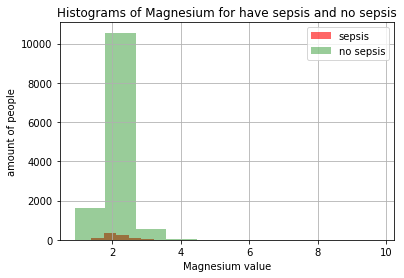


 Ttest - Check Magnesium parameter:
Test statistic is 3.346365
p-value for two tailed test is 0.000821
Conclusion n Since p-value(=0.000821) < alpha(=0.05) We reject the null hypothesis H0 for Magnesium parameter. at 0.05 level of significance.

 Wilcoxon  - Check Magnesium parameter in wilcoxon test:
Test statistic is 5599809.500000
p-value for two tailed test is 0.000240
Conclusion n Since p-value(=0.000240) < alpha(=0.05) We reject the null hypothesis H0 for Magnesium parameter. at 0.05 level of significance.





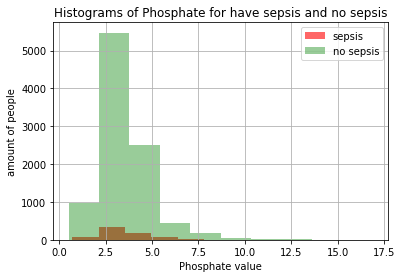


 Ttest - Check Phosphate parameter:
Test statistic is 1.564374
p-value for two tailed test is 0.117760
Conclusion n Since p-value(=0.117760) > alpha(=0.05) We do not reject the null hypothesis H0 for Phosphate parameter.

 Wilcoxon  - Check Phosphate parameter in wilcoxon test:
Test statistic is 3459569.000000
p-value for two tailed test is 0.356921
Conclusion n Since p-value(=0.356921) > alpha(=0.05) We do not reject the null hypothesis H0 for Phosphate parameter.





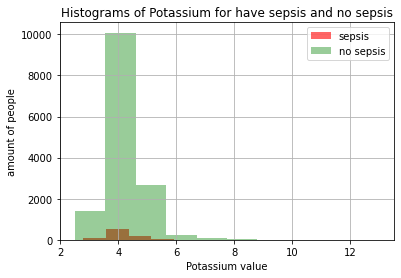


 Ttest - Check Potassium parameter:
Test statistic is 0.029304
p-value for two tailed test is 0.976623
Conclusion n Since p-value(=0.976623) > alpha(=0.05) We do not reject the null hypothesis H0 for Potassium parameter.

 Wilcoxon  - Check Potassium parameter in wilcoxon test:
Test statistic is 6053364.500000
p-value for two tailed test is 0.006588
Conclusion n Since p-value(=0.006588) < alpha(=0.05) We reject the null hypothesis H0 for Potassium parameter. at 0.05 level of significance.





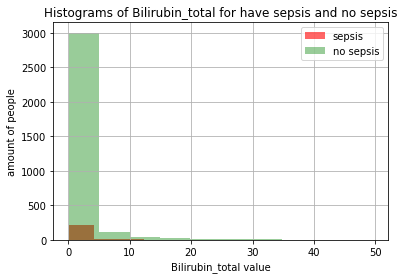


 Ttest - Check Bilirubin_total parameter:
Test statistic is 3.109004
p-value for two tailed test is 0.001892
Conclusion n Since p-value(=0.001892) < alpha(=0.05) We reject the null hypothesis H0 for Bilirubin_total parameter. at 0.05 level of significance.

 Wilcoxon  - Check Bilirubin_total parameter in wilcoxon test:
Test statistic is 438778.000000
p-value for two tailed test is 0.055420
Conclusion n Since p-value(=0.055420) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_total parameter.





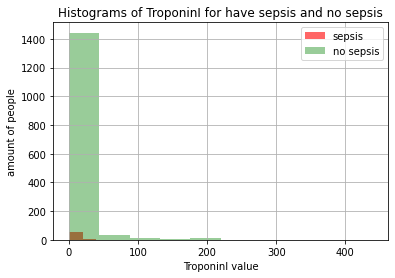


 Ttest - Check TroponinI parameter:
Test statistic is 1.130453
p-value for two tailed test is 0.258458
Conclusion n Since p-value(=0.258458) > alpha(=0.05) We do not reject the null hypothesis H0 for TroponinI parameter.

 Wilcoxon  - Check TroponinI parameter in wilcoxon test:
Test statistic is 56783.500000
p-value for two tailed test is 0.120123
Conclusion n Since p-value(=0.120123) > alpha(=0.05) We do not reject the null hypothesis H0 for TroponinI parameter.





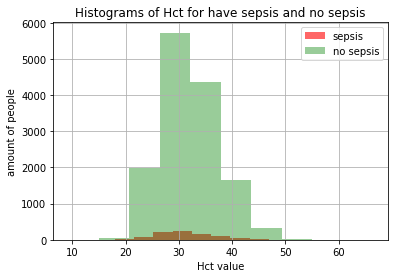


 Ttest - Check Hct parameter:
Test statistic is -4.974794
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0 for Hct parameter. at 0.05 level of significance.

 Wilcoxon  - Check Hct parameter in wilcoxon test:
Test statistic is 5660863.500000
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0 for Hct parameter. at 0.05 level of significance.





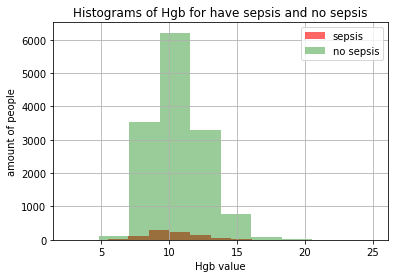


 Ttest - Check Hgb parameter:
Test statistic is -5.100564
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Hgb parameter. at 0.05 level of significance.

 Wilcoxon  - Check Hgb parameter in wilcoxon test:
Test statistic is 5386141.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Hgb parameter. at 0.05 level of significance.





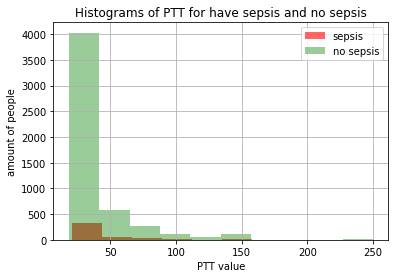


 Ttest - Check PTT parameter:
Test statistic is 2.848379
p-value for two tailed test is 0.004410
Conclusion n Since p-value(=0.004410) < alpha(=0.05) We reject the null hypothesis H0 for PTT parameter. at 0.05 level of significance.

 Wilcoxon  - Check PTT parameter in wilcoxon test:
Test statistic is 1283426.500000
p-value for two tailed test is 0.001086
Conclusion n Since p-value(=0.001086) < alpha(=0.05) We reject the null hypothesis H0 for PTT parameter. at 0.05 level of significance.





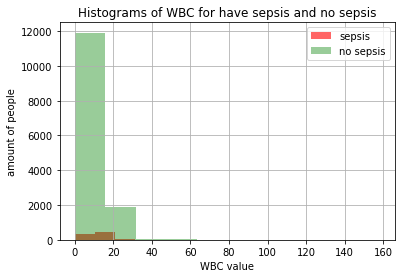


 Ttest - Check WBC parameter:
Test statistic is 9.047368
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for WBC parameter. at 0.05 level of significance.

 Wilcoxon  - Check WBC parameter in wilcoxon test:
Test statistic is 6963512.500000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for WBC parameter. at 0.05 level of significance.





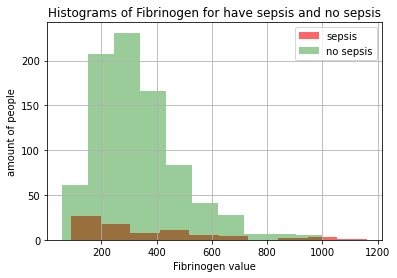


 Ttest - Check Fibrinogen parameter:
Test statistic is 1.257858
p-value for two tailed test is 0.208765
Conclusion n Since p-value(=0.208765) > alpha(=0.05) We do not reject the null hypothesis H0 for Fibrinogen parameter.

 Wilcoxon  - Check Fibrinogen parameter in wilcoxon test:
Test statistic is 31559.500000
p-value for two tailed test is 0.514956
Conclusion n Since p-value(=0.514956) > alpha(=0.05) We do not reject the null hypothesis H0 for Fibrinogen parameter.





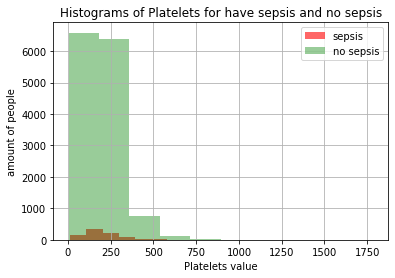


 Ttest - Check Platelets parameter:
Test statistic is 2.276670
p-value for two tailed test is 0.022820
Conclusion n Since p-value(=0.022820) < alpha(=0.05) We reject the null hypothesis H0 for Platelets parameter. at 0.05 level of significance.

 Wilcoxon  - Check Platelets parameter in wilcoxon test:
Test statistic is 5973839.500000
p-value for two tailed test is 0.515377
Conclusion n Since p-value(=0.515377) > alpha(=0.05) We do not reject the null hypothesis H0 for Platelets parameter.





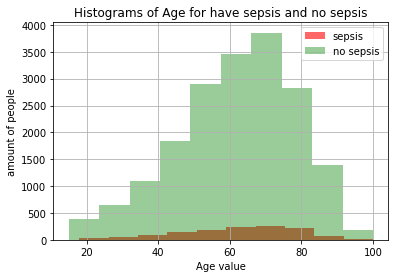


 Ttest - Check Age parameter:
Test statistic is 1.440456
p-value for two tailed test is 0.149754
Conclusion n Since p-value(=0.149754) > alpha(=0.05) We do not reject the null hypothesis H0 for Age parameter.

 Wilcoxon  - Check Age parameter in wilcoxon test:
Test statistic is 12306554.000000
p-value for two tailed test is 0.131686
Conclusion n Since p-value(=0.131686) > alpha(=0.05) We do not reject the null hypothesis H0 for Age parameter.





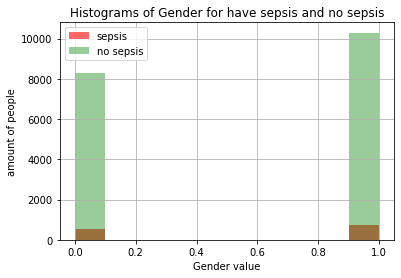


 Ttest - Check Gender parameter:
Test statistic is 1.667015
p-value for two tailed test is 0.095527
Conclusion n Since p-value(=0.095527) > alpha(=0.05) We do not reject the null hypothesis H0 for Gender parameter.

 Wilcoxon  - Check Gender parameter in wilcoxon test:
Test statistic is 12292067.000000
p-value for two tailed test is 0.095527
Conclusion n Since p-value(=0.095527) > alpha(=0.05) We do not reject the null hypothesis H0 for Gender parameter.



-------------------------------------------------------
histograms, Ttest and Wilcoxon-Test results for last-mean difference of each parameter
-------------------------------------------------------


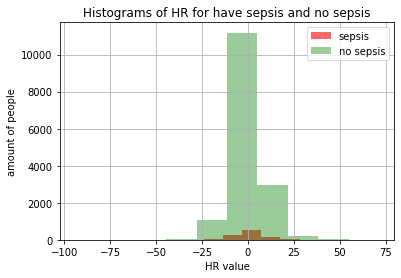


 Ttest - Check HR parameter:
Test statistic is 4.833465
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0 for HR parameter. at 0.05 level of significance.

 Wilcoxon  - Check HR parameter in wilcoxon test:
Test statistic is 12303692.500000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for HR parameter. at 0.05 level of significance.





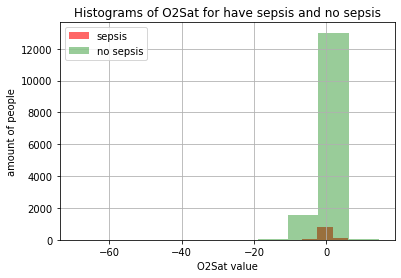


 Ttest - Check O2Sat parameter:
Test statistic is 0.080199
p-value for two tailed test is 0.936080
Conclusion n Since p-value(=0.936080) > alpha(=0.05) We do not reject the null hypothesis H0 for O2Sat parameter.

 Wilcoxon  - Check O2Sat parameter in wilcoxon test:
Test statistic is 11078426.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for O2Sat parameter. at 0.05 level of significance.





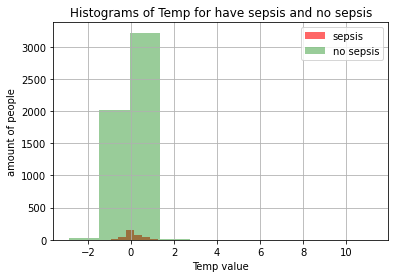


 Ttest - Check Temp parameter:
Test statistic is 4.416724
p-value for two tailed test is 0.000010
Conclusion n Since p-value(=0.000010) < alpha(=0.05) We reject the null hypothesis H0 for Temp parameter. at 0.05 level of significance.

 Wilcoxon  - Check Temp parameter in wilcoxon test:
Test statistic is 10516195.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Temp parameter. at 0.05 level of significance.





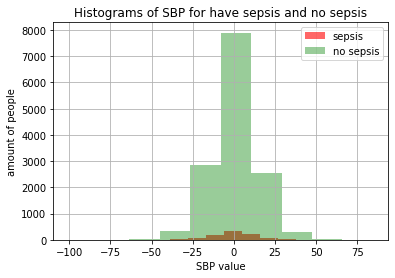


 Ttest - Check SBP parameter:
Test statistic is 0.175990
p-value for two tailed test is 0.860304
Conclusion n Since p-value(=0.860304) > alpha(=0.05) We do not reject the null hypothesis H0 for SBP parameter.

 Wilcoxon  - Check SBP parameter in wilcoxon test:
Test statistic is 8962797.000000
p-value for two tailed test is 0.036610
Conclusion n Since p-value(=0.036610) < alpha(=0.05) We reject the null hypothesis H0 for SBP parameter. at 0.05 level of significance.





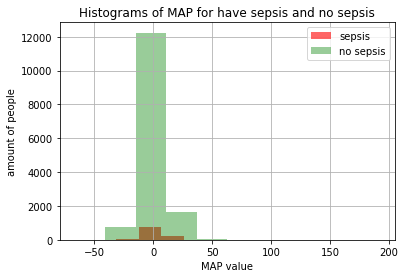


 Ttest - Check MAP parameter:
Test statistic is 0.918605
p-value for two tailed test is 0.358317
Conclusion n Since p-value(=0.358317) > alpha(=0.05) We do not reject the null hypothesis H0 for MAP parameter.

 Wilcoxon  - Check MAP parameter in wilcoxon test:
Test statistic is 9505940.500000
p-value for two tailed test is 0.000583
Conclusion n Since p-value(=0.000583) < alpha(=0.05) We reject the null hypothesis H0 for MAP parameter. at 0.05 level of significance.





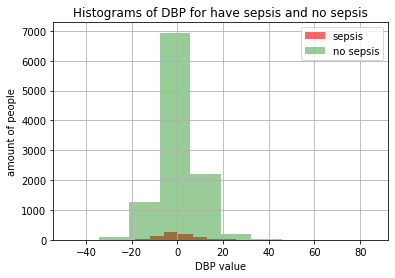


 Ttest - Check DBP parameter:
Test statistic is -0.443172
p-value for two tailed test is 0.657650
Conclusion n Since p-value(=0.657650) > alpha(=0.05) We do not reject the null hypothesis H0 for DBP parameter.

 Wilcoxon  - Check DBP parameter in wilcoxon test:
Test statistic is 5793612.000000
p-value for two tailed test is 0.000082
Conclusion n Since p-value(=0.000082) < alpha(=0.05) We reject the null hypothesis H0 for DBP parameter. at 0.05 level of significance.





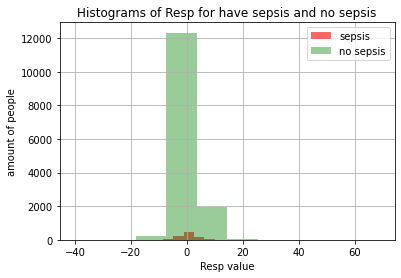


 Ttest - Check Resp parameter:
Test statistic is 0.372601
p-value for two tailed test is 0.709451
Conclusion n Since p-value(=0.709451) > alpha(=0.05) We do not reject the null hypothesis H0 for Resp parameter.

 Wilcoxon  - Check Resp parameter in wilcoxon test:
Test statistic is 11674948.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Resp parameter. at 0.05 level of significance.





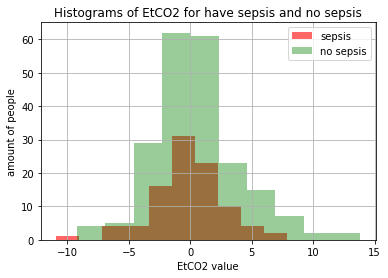


 Ttest - Check EtCO2 parameter:
Test statistic is -1.651050
p-value for two tailed test is 0.099764
Conclusion n Since p-value(=0.099764) > alpha(=0.05) We do not reject the null hypothesis H0 for EtCO2 parameter.

 Wilcoxon  - Check EtCO2 parameter in wilcoxon test:
Test statistic is 42594.500000
p-value for two tailed test is 0.664844
Conclusion n Since p-value(=0.664844) > alpha(=0.05) We do not reject the null hypothesis H0 for EtCO2 parameter.





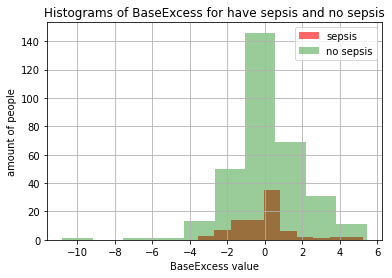


 Ttest - Check BaseExcess parameter:
Test statistic is -1.557603
p-value for two tailed test is 0.120104
Conclusion n Since p-value(=0.120104) > alpha(=0.05) We do not reject the null hypothesis H0 for BaseExcess parameter.

 Wilcoxon  - Check BaseExcess parameter in wilcoxon test:
Test statistic is 848686.500000
p-value for two tailed test is 0.019760
Conclusion n Since p-value(=0.019760) < alpha(=0.05) We reject the null hypothesis H0 for BaseExcess parameter. at 0.05 level of significance.





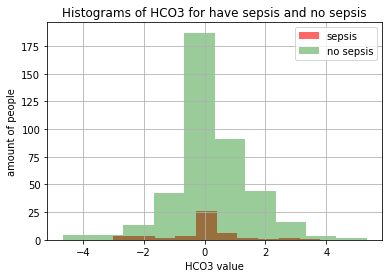


 Ttest - Check HCO3 parameter:
Test statistic is -0.839124
p-value for two tailed test is 0.401842
Conclusion n Since p-value(=0.401842) > alpha(=0.05) We do not reject the null hypothesis H0 for HCO3 parameter.

 Wilcoxon  - Check HCO3 parameter in wilcoxon test:
Test statistic is 2013805.000000
p-value for two tailed test is 0.562284
Conclusion n Since p-value(=0.562284) > alpha(=0.05) We do not reject the null hypothesis H0 for HCO3 parameter.





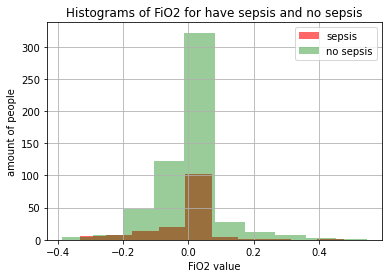


 Ttest - Check FiO2 parameter:
Test statistic is -1.817094
p-value for two tailed test is 0.069622
Conclusion n Since p-value(=0.069622) > alpha(=0.05) We do not reject the null hypothesis H0 for FiO2 parameter.

 Wilcoxon  - Check FiO2 parameter in wilcoxon test:
Test statistic is 1507641.000000
p-value for two tailed test is 0.000101
Conclusion n Since p-value(=0.000101) < alpha(=0.05) We reject the null hypothesis H0 for FiO2 parameter. at 0.05 level of significance.





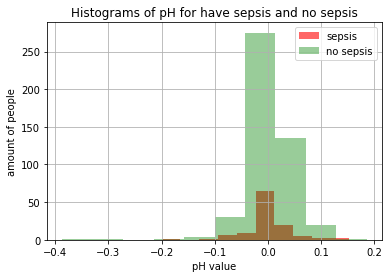


 Ttest - Check pH parameter:
Test statistic is -0.691877
p-value for two tailed test is 0.489293
Conclusion n Since p-value(=0.489293) > alpha(=0.05) We do not reject the null hypothesis H0 for pH parameter.

 Wilcoxon  - Check pH parameter in wilcoxon test:
Test statistic is 1465724.000000
p-value for two tailed test is 0.172022
Conclusion n Since p-value(=0.172022) > alpha(=0.05) We do not reject the null hypothesis H0 for pH parameter.





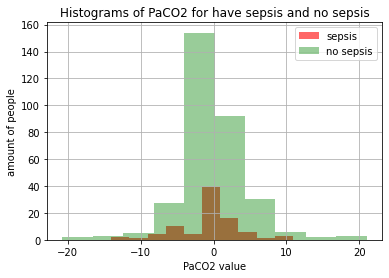


 Ttest - Check PaCO2 parameter:
Test statistic is -0.904635
p-value for two tailed test is 0.366193
Conclusion n Since p-value(=0.366193) > alpha(=0.05) We do not reject the null hypothesis H0 for PaCO2 parameter.

 Wilcoxon  - Check PaCO2 parameter in wilcoxon test:
Test statistic is 1191247.500000
p-value for two tailed test is 0.976337
Conclusion n Since p-value(=0.976337) > alpha(=0.05) We do not reject the null hypothesis H0 for PaCO2 parameter.





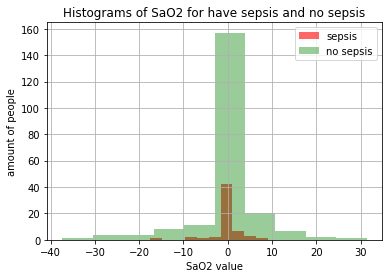


 Ttest - Check SaO2 parameter:
Test statistic is -0.060368
p-value for two tailed test is 0.951907
Conclusion n Since p-value(=0.951907) > alpha(=0.05) We do not reject the null hypothesis H0 for SaO2 parameter.

 Wilcoxon  - Check SaO2 parameter in wilcoxon test:
Test statistic is 479035.500000
p-value for two tailed test is 0.001774
Conclusion n Since p-value(=0.001774) < alpha(=0.05) We reject the null hypothesis H0 for SaO2 parameter. at 0.05 level of significance.





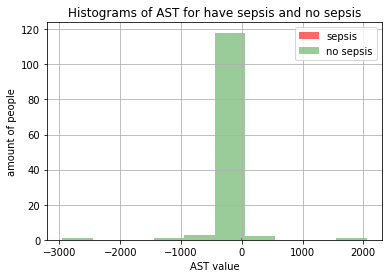


 Ttest - Check AST parameter:
Test statistic is 0.477202
p-value for two tailed test is 0.633968
Conclusion n Since p-value(=0.633968) > alpha(=0.05) We do not reject the null hypothesis H0 for AST parameter.

 Wilcoxon  - Check AST parameter in wilcoxon test:
Test statistic is 451343.000000
p-value for two tailed test is 0.011535
Conclusion n Since p-value(=0.011535) < alpha(=0.05) We reject the null hypothesis H0 for AST parameter. at 0.05 level of significance.





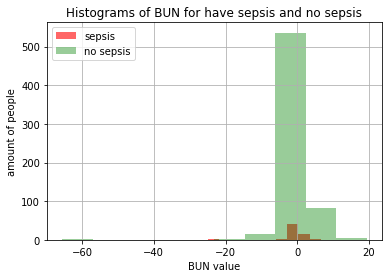


 Ttest - Check BUN parameter:
Test statistic is 0.097013
p-value for two tailed test is 0.922744
Conclusion n Since p-value(=0.922744) > alpha(=0.05) We do not reject the null hypothesis H0 for BUN parameter.

 Wilcoxon  - Check BUN parameter in wilcoxon test:
Test statistic is 7187585.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for BUN parameter. at 0.05 level of significance.





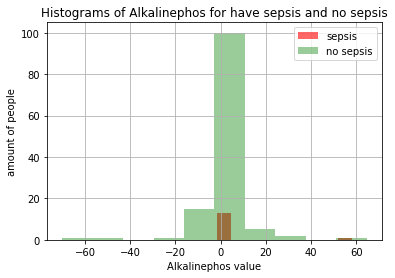


 Ttest - Check Alkalinephos parameter:
Test statistic is 1.121320
p-value for two tailed test is 0.264099
Conclusion n Since p-value(=0.264099) > alpha(=0.05) We do not reject the null hypothesis H0 for Alkalinephos parameter.

 Wilcoxon  - Check Alkalinephos parameter in wilcoxon test:
Test statistic is 402449.500000
p-value for two tailed test is 0.458888
Conclusion n Since p-value(=0.458888) > alpha(=0.05) We do not reject the null hypothesis H0 for Alkalinephos parameter.





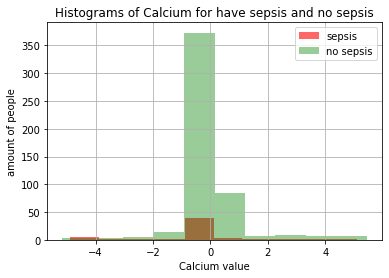


 Ttest - Check Calcium parameter:
Test statistic is -2.793469
p-value for two tailed test is 0.005391
Conclusion n Since p-value(=0.005391) < alpha(=0.05) We reject the null hypothesis H0 for Calcium parameter. at 0.05 level of significance.

 Wilcoxon  - Check Calcium parameter in wilcoxon test:
Test statistic is 4258344.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Calcium parameter. at 0.05 level of significance.





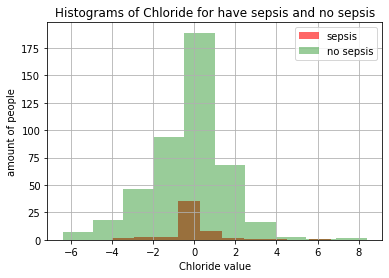


 Ttest - Check Chloride parameter:
Test statistic is 1.464628
p-value for two tailed test is 0.143653
Conclusion n Since p-value(=0.143653) > alpha(=0.05) We do not reject the null hypothesis H0 for Chloride parameter.

 Wilcoxon  - Check Chloride parameter in wilcoxon test:
Test statistic is 2347707.500000
p-value for two tailed test is 0.081692
Conclusion n Since p-value(=0.081692) > alpha(=0.05) We do not reject the null hypothesis H0 for Chloride parameter.





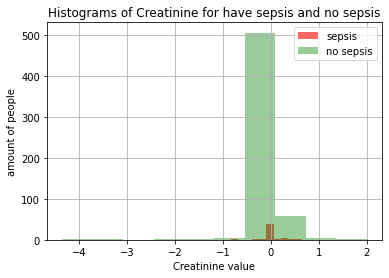


 Ttest - Check Creatinine parameter:
Test statistic is 0.604981
p-value for two tailed test is 0.545410
Conclusion n Since p-value(=0.545410) > alpha(=0.05) We do not reject the null hypothesis H0 for Creatinine parameter.

 Wilcoxon  - Check Creatinine parameter in wilcoxon test:
Test statistic is 6310030.500000
p-value for two tailed test is 0.014732
Conclusion n Since p-value(=0.014732) < alpha(=0.05) We reject the null hypothesis H0 for Creatinine parameter. at 0.05 level of significance.





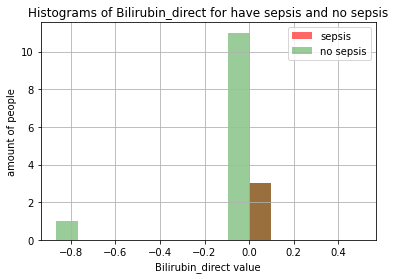


 Ttest - Check Bilirubin_direct parameter:
Test statistic is 0.309281
p-value for two tailed test is 0.761099
Conclusion n Since p-value(=0.761099) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_direct parameter.

 Wilcoxon  - Check Bilirubin_direct parameter in wilcoxon test:
Test statistic is 8312.000000
p-value for two tailed test is 0.006469
Conclusion n Since p-value(=0.006469) < alpha(=0.05) We reject the null hypothesis H0 for Bilirubin_direct parameter. at 0.05 level of significance.





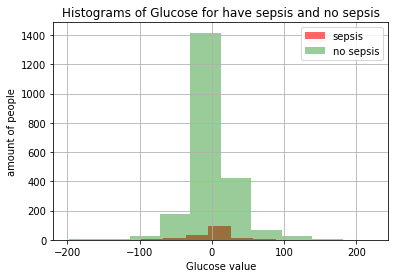


 Ttest - Check Glucose parameter:
Test statistic is -0.274036
p-value for two tailed test is 0.784081
Conclusion n Since p-value(=0.784081) > alpha(=0.05) We do not reject the null hypothesis H0 for Glucose parameter.

 Wilcoxon  - Check Glucose parameter in wilcoxon test:
Test statistic is 7982248.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Glucose parameter. at 0.05 level of significance.





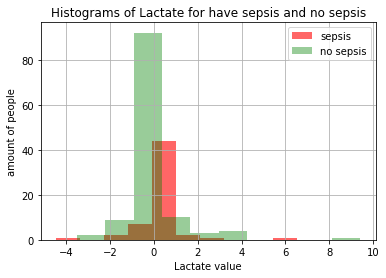


 Ttest - Check Lactate parameter:
Test statistic is 0.126918
p-value for two tailed test is 0.899150
Conclusion n Since p-value(=0.899150) > alpha(=0.05) We do not reject the null hypothesis H0 for Lactate parameter.

 Wilcoxon  - Check Lactate parameter in wilcoxon test:
Test statistic is 410670.000000
p-value for two tailed test is 0.105473
Conclusion n Since p-value(=0.105473) > alpha(=0.05) We do not reject the null hypothesis H0 for Lactate parameter.





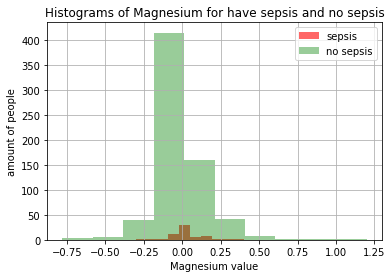


 Ttest - Check Magnesium parameter:
Test statistic is 0.117284
p-value for two tailed test is 0.906667
Conclusion n Since p-value(=0.906667) > alpha(=0.05) We do not reject the null hypothesis H0 for Magnesium parameter.

 Wilcoxon  - Check Magnesium parameter in wilcoxon test:
Test statistic is 5599809.500000
p-value for two tailed test is 0.000240
Conclusion n Since p-value(=0.000240) < alpha(=0.05) We reject the null hypothesis H0 for Magnesium parameter. at 0.05 level of significance.





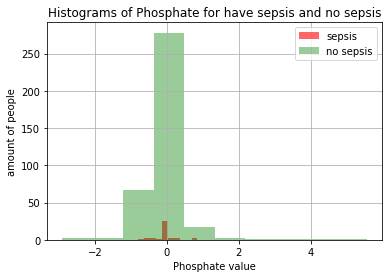


 Ttest - Check Phosphate parameter:
Test statistic is 0.488958
p-value for two tailed test is 0.625132
Conclusion n Since p-value(=0.625132) > alpha(=0.05) We do not reject the null hypothesis H0 for Phosphate parameter.

 Wilcoxon  - Check Phosphate parameter in wilcoxon test:
Test statistic is 3459569.000000
p-value for two tailed test is 0.356921
Conclusion n Since p-value(=0.356921) > alpha(=0.05) We do not reject the null hypothesis H0 for Phosphate parameter.





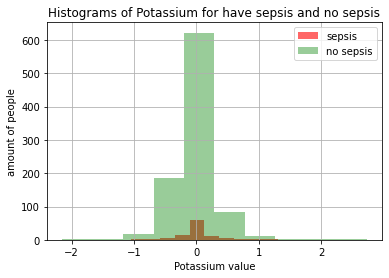


 Ttest - Check Potassium parameter:
Test statistic is 0.730792
p-value for two tailed test is 0.465073
Conclusion n Since p-value(=0.465073) > alpha(=0.05) We do not reject the null hypothesis H0 for Potassium parameter.

 Wilcoxon  - Check Potassium parameter in wilcoxon test:
Test statistic is 6053364.500000
p-value for two tailed test is 0.006588
Conclusion n Since p-value(=0.006588) < alpha(=0.05) We reject the null hypothesis H0 for Potassium parameter. at 0.05 level of significance.





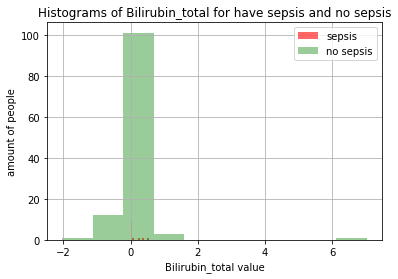


 Ttest - Check Bilirubin_total parameter:
Test statistic is 0.182599
p-value for two tailed test is 0.855399
Conclusion n Since p-value(=0.855399) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_total parameter.

 Wilcoxon  - Check Bilirubin_total parameter in wilcoxon test:
Test statistic is 438778.000000
p-value for two tailed test is 0.055420
Conclusion n Since p-value(=0.055420) > alpha(=0.05) We do not reject the null hypothesis H0 for Bilirubin_total parameter.





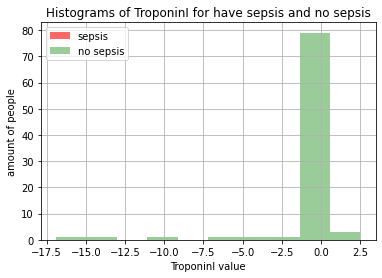


 Ttest - Check TroponinI parameter:
Test statistic is 0.579073
p-value for two tailed test is 0.563925
Conclusion n Since p-value(=0.563925) > alpha(=0.05) We do not reject the null hypothesis H0 for TroponinI parameter.

 Wilcoxon  - Check TroponinI parameter in wilcoxon test:
Test statistic is 56783.500000
p-value for two tailed test is 0.120123
Conclusion n Since p-value(=0.120123) > alpha(=0.05) We do not reject the null hypothesis H0 for TroponinI parameter.





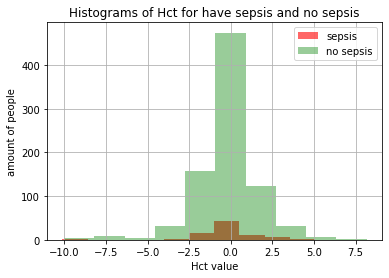


 Ttest - Check Hct parameter:
Test statistic is 0.527487
p-value for two tailed test is 0.597982
Conclusion n Since p-value(=0.597982) > alpha(=0.05) We do not reject the null hypothesis H0 for Hct parameter.

 Wilcoxon  - Check Hct parameter in wilcoxon test:
Test statistic is 5660863.500000
p-value for two tailed test is 0.000001
Conclusion n Since p-value(=0.000001) < alpha(=0.05) We reject the null hypothesis H0 for Hct parameter. at 0.05 level of significance.





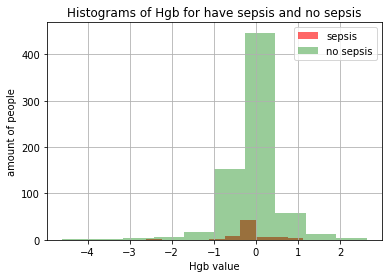


 Ttest - Check Hgb parameter:
Test statistic is 0.329507
p-value for two tailed test is 0.741862
Conclusion n Since p-value(=0.741862) > alpha(=0.05) We do not reject the null hypothesis H0 for Hgb parameter.

 Wilcoxon  - Check Hgb parameter in wilcoxon test:
Test statistic is 5386141.000000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for Hgb parameter. at 0.05 level of significance.





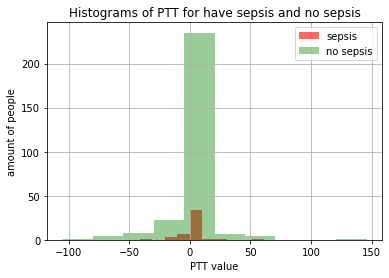


 Ttest - Check PTT parameter:
Test statistic is 0.253875
p-value for two tailed test is 0.799751
Conclusion n Since p-value(=0.799751) > alpha(=0.05) We do not reject the null hypothesis H0 for PTT parameter.

 Wilcoxon  - Check PTT parameter in wilcoxon test:
Test statistic is 1283426.500000
p-value for two tailed test is 0.001086
Conclusion n Since p-value(=0.001086) < alpha(=0.05) We reject the null hypothesis H0 for PTT parameter. at 0.05 level of significance.





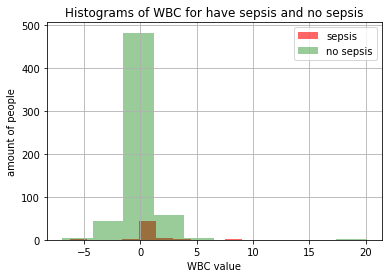


 Ttest - Check WBC parameter:
Test statistic is 1.572348
p-value for two tailed test is 0.116356
Conclusion n Since p-value(=0.116356) > alpha(=0.05) We do not reject the null hypothesis H0 for WBC parameter.

 Wilcoxon  - Check WBC parameter in wilcoxon test:
Test statistic is 6963512.500000
p-value for two tailed test is 0.000000
Conclusion n Since p-value(=0.000000) < alpha(=0.05) We reject the null hypothesis H0 for WBC parameter. at 0.05 level of significance.





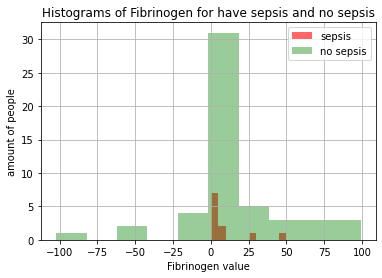


 Ttest - Check Fibrinogen parameter:
Test statistic is -0.250129
p-value for two tailed test is 0.803328
Conclusion n Since p-value(=0.803328) > alpha(=0.05) We do not reject the null hypothesis H0 for Fibrinogen parameter.

 Wilcoxon  - Check Fibrinogen parameter in wilcoxon test:
Test statistic is 31559.500000
p-value for two tailed test is 0.514956
Conclusion n Since p-value(=0.514956) > alpha(=0.05) We do not reject the null hypothesis H0 for Fibrinogen parameter.





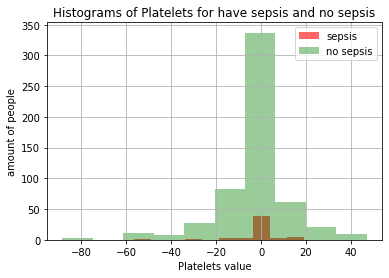


 Ttest - Check Platelets parameter:
Test statistic is 0.635760
p-value for two tailed test is 0.525170
Conclusion n Since p-value(=0.525170) > alpha(=0.05) We do not reject the null hypothesis H0 for Platelets parameter.

 Wilcoxon  - Check Platelets parameter in wilcoxon test:
Test statistic is 5973839.500000
p-value for two tailed test is 0.515377
Conclusion n Since p-value(=0.515377) > alpha(=0.05) We do not reject the null hypothesis H0 for Platelets parameter.





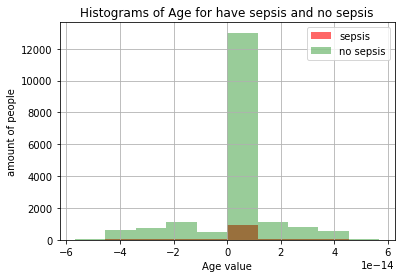


 Ttest - Check Age parameter:
Test statistic is -2.325163
p-value for two tailed test is 0.020073
Conclusion n Since p-value(=0.020073) < alpha(=0.05) We reject the null hypothesis H0 for Age parameter. at 0.05 level of significance.

 Wilcoxon  - Check Age parameter in wilcoxon test:
Test statistic is 12306554.000000
p-value for two tailed test is 0.131686
Conclusion n Since p-value(=0.131686) > alpha(=0.05) We do not reject the null hypothesis H0 for Age parameter.





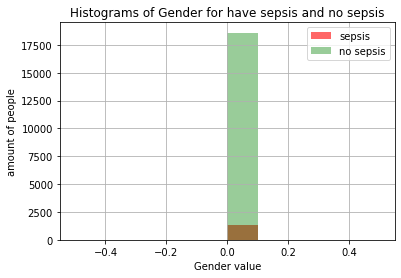


 Ttest - Check Gender parameter:
Test statistic is nan
p-value for two tailed test is nan
Conclusion n Since p-value(=nan) > alpha(=0.05) We do not reject the null hypothesis H0 for Gender parameter.

 Wilcoxon  - Check Gender parameter in wilcoxon test:
Test statistic is 12292067.000000
p-value for two tailed test is 0.095527
Conclusion n Since p-value(=0.095527) > alpha(=0.05) We do not reject the null hypothesis H0 for Gender parameter.





In [ ]:
# print the histograms and Ttest results for each dataframe

parametersList = list(full_data.columns)
parametersList = [x for x in parametersList if x not in ['Unit1','Unit2','HospAdmTime','ICULOS','SepsisLabel']]

def printRes(DFrame, metric):
  print("-------------------------------------------------------")
  print(f'histograms, Ttest and Wilcoxon-Test results for {metric} of each parameter')
  print("-------------------------------------------------------")
  TParameters = []
  WParameters = []
  for col in parametersList:
    printHist(col,DFrame)
    checkT = tTest(col, DFrame)
    if checkT:
      TParameters.append(col)
    checkW = WTest(col, DFrame)
    if checkW:
      WParameters.append(col)
  return TParameters,WParameters

  

meanTParameters, meanWParameters = printRes(dfMean,'mean')
stdTParameters, stdWParameters = printRes(dfStd,'std')
maxTParameters, maxWParameters = printRes(dfMax,'max')
minTParameters, minWParameters = printRes(dfMin,'min')
lastMeanDifTParameters, lastMeanDifWParameters = printRes(dfLastMeanDif,'last-mean difference')


In [ ]:
# for each metric, print the parameters that lead to rejecting H0

print('For each parameter and each aggrigation version- mean/std/max/min/lastMeanDifference - we will check the null hypothesis H0\n')
print('TTest - Parameters that their mean values per patient leads to rejecting the null hypothesis H0: ')
print(meanTParameters)
print('Wilcoxon Test - Parameters that their mean values per patient leads to rejecting the null hypothesis H0: ')
print(meanWParameters)
print('\n')

print('\n TTest - Parameters that their std values per patient leads to rejecting the null hypothesis H0: ')
print(stdTParameters)
print('\n Wilcoxon Test - Parameters that their std values per patient leads to rejecting the null hypothesis H0: ')
print(stdWParameters)
print('\n')

print('\n TTest - Parameters that their max values per patient leads to rejecting the null hypothesis H0: ')
print(maxTParameters)
print('\n Wilcoxon Test - Parameters that their max values per patient leads to rejecting the null hypothesis H0: ')
print(maxWParameters)
print('\n')

print('\n TTest - Parameters that their min values per patient leads to rejecting the null hypothesis H0: ')
print(minTParameters)
print('\n Wilcoxon Test - Parameters that their min values per patient leads to rejecting the null hypothesis H0: ')
print(minWParameters)
print('\n')

print('\n TTest - Parameters that their last-mean difference values per patient leads to rejecting the null hypothesis H0: ')
print(lastMeanDifTParameters)
print('\n Wilcoxon Test - Parameters that their last-mean difference values per patient leads to rejecting the null hypothesis H0: ')
print(lastMeanDifWParameters)

For each parameter and each aggrigation version- mean/std/max/min/lastMeanDifference - we will check the null hypothesis H0

TTest - Parameters that their mean values per patient leads to rejecting the null hypothesis H0: 
['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess', 'FiO2', 'SaO2', 'BUN', 'Calcium', 'Glucose', 'Magnesium', 'Bilirubin_total', 'Hct', 'Hgb', 'PTT', 'WBC', 'Platelets']
Wilcoxon Test - Parameters that their mean values per patient leads to rejecting the null hypothesis H0: 
['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'BaseExcess', 'FiO2', 'SaO2', 'AST', 'BUN', 'Calcium', 'Creatinine', 'Bilirubin_direct', 'Glucose', 'Magnesium', 'Potassium', 'Hct', 'Hgb', 'PTT', 'WBC']



 TTest - Parameters that their std values per patient leads to rejecting the null hypothesis H0: 
['HR', 'Temp', 'SBP', 'SaO2', 'Calcium', 'Chloride', 'Hct', 'Hgb']

 Wilcoxon Test - Parameters that their std values per patient leads to rejecting the null hypothesis H0: 
['HR